# CE9010 Introduction To Data Analysis

## Group 3

Student Name  |  Matric No  
:-:|:-:
Say Yueyang, Symus|U1922016K   
He Zeqing|U1722721G
Kwek Yan Qing|U1740743J   

---

# Background

Haze is one major form of air pollution that Singaporeans face annually. The presence of haze is attributed to the forest fires in Sumatra, Indonesia. Due to the increase in demand of commercial crops, Indonesian farmers have resorted to shifting agriculture, which includes the large-scale slash-and-burn of forest land to produce fertile planting grounds. The resulting air pollution is then spread across the region by the climatic phenomenon El Nino, enveloping Singapore in a blanket of haze and affecting the overall health of Singaporeans. In 2020, Indonesia fires torched approximately 207,000 hectares of forests from January to September. While the area is smaller compared to previous years, the burning resulted in a US$5.2 billion cost towards the Indonesian economy, and the occurrence of toxic smog over the city.

**References:**
- [Haze Pollution](https://eresources.nlb.gov.sg/infopedia/articles/SIP_2013-08-30_185150.html#:~:text=Forest%20fires%20in%20Sumatra%2C%20Indonesia,of%20the%20haze%20in%20Singapore.&text=Strong%20winds%20during%20the%20southwest,such%20fires%20throughout%20Southeast%20Asia.)
- [Commentary: Little smoke this haze season – but fires rage on in Indonesia](https://www.channelnewsasia.com/news/commentary/indonesia-forest-fire-peat-haze-palm-oil-jokowi-omnibus-bill-13533700)

# Objective

The objective of our study is to predict the possible intensity of future hotspots in South East Asia, including Indonesia.
Hopefully, this study will be able to support further research in estimating the possibility and severity of the occurrences of haze in Singapore.

Our study will be conducted with the relevant data on forest fires in South East Asia. Our dataset is obtained from the National Aeronautics and Space Administration (NASA)'s Fire Information for Resource Management System (FIRMS). It contains both geographical and technical data extracted from the Visible Infrared Imaging Radiometer Suite (VIIRS) sensor aboard their NOAA-20 weather satellite.

The table below describes each data available in our dataset:

| Data | Description |
| -: | :- |
| latitude | Indicates the latitude of fire pixel. |
| longitude	| Indicates the longitude of fire pixel. |
| bright_ti4 | Indicates the VIIRS I-4 Channel brightness temperature of the fire pixel. |
| scan | Indicates the  Along Scan pixel size. |
| track	| Indicates the Along Track pixel size.  |
| acq_date | Indicates the date of the acquired data. |
| acq_time | Indicates the time of the acquired data. |
| satellite | Indicates if the scan was done by the satellite (boolean values). |
| confidence | Indicates the confidence level of the data collected. |
| version | Indicates the version and source of data processing. |
| bright_ti5 | Indicates the VIIRS I-5 Channel brightness temperature of the fire pixel. |
| frp | Indicates the Fire Radiative Power (Detected thermal strength of the fire). |
| daynight | Indicates whether if it's daytime fire or nighttime fire. |

**References:**
- [Fire Information for Resource Management System](https://firms2.modaps.eosdis.nasa.gov/)
- [Visible Infrared Imaging Radiometer Suite](https://en.wikipedia.org/wiki/Visible_Infrared_Imaging_Radiometer_Suite)
- [Attribute Fields](https://earthdata.nasa.gov/earth-observation-data/near-real-time/firms/v1-vnp14imgt#ed-viirs-375m-attributes)

---

# Table of Contents

1. [Setup](#1-|-Setup)
2. [Dataset Summaries](#2-|-Dataset-Summaries)
3. [Exploratory Data Analysis](#3-|-Exploratory-Data-Analysis)
4. [Data Pre-Preprocessing](#4-|-Data-Pre-Processing)
5. [Data Analysis](#5-|-Data-Analysis)
6. [Results Analysis](#6-|-Results-Analysis)

# 1 | Setup 

## 1.1 | Setup on Anaconda Prompt/local computer

1. Ensure that the environment.yml file accompanying this notebook is located in the same directory as the notebook. <br>
2. Open Anaconda Prompt, and in Anaconda Prompt, navigate to the directory where the notebook was downloaded. <br>
3. In Anaconda Prompt, enter the following line of code:
> conda env create -f environment.yml

4. In Anaconda Prompt, enter the following line of code:
> conda info --envs

If installation of the environment is successful, you will see the environment 'CE9010_2021_Group3' listed in the list of environments.

5. Activate the notebook: 
> conda activate CE9010_2021_Group3

6. Run Jupyter Notebook 
> jupyter notebook

## 1.2 | Import modules
Run this to import all the modules required, regardless of what environment you are running in. Make sure that the imports have no errors before proceeding.

In [188]:
# Import required modules
import os
try:
    import pandas as pd
    import plotly.express as px
    from matplotlib import pyplot as plt
    from IPython.display import IFrame,Image
    import seaborn as sns
    import numpy as np
    import imageio
    import geopandas as gpd
    import graphviz
    # import rtree
    # import pygeos
    print ("All modules imported successfully.")
except ImportError:
    print ("One or more modules not imported!")
    print ("Please check that all dependencies are installed.")

# Directory to store local content for loading of interactive images
if not os.path.exists("content"):
    os.mkdir("content")
# Clean up past images
else:
    for f in os.listdir('./content'):
        os.remove(os.path.join('content', f))

All modules imported successfully.


In [189]:
#this is a class used later to block printing of functions. 
#for blocking of prints
import os, sys

class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

with HiddenPrints():
    print("This will not be printed")

print("This will be printed as before")

This will be printed as before


# 2 | Dataset Summaries 

In [190]:
# Data Acquisition
# Import data from the Active Fire Dataset, VIIRS 375m / NOAA-20
raw_data = pd.read_csv("https://firms2.modaps.eosdis.nasa.gov/data/active_fire/noaa-20-viirs-c2/csv/J1_VIIRS_C2_SouthEast_Asia_7d.csv",sep=',')
print (raw_data.shape) # dimensions
raw_data[:5]

(45386, 13)


,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,confidence,version,bright_ti5,frp,daynight
0,-9.42393,150.19067,338.6,0.38,0.36,2021-04-06,330,1,nominal,2.0NRT,283.7,4.5,D
1,-6.58918,146.84656,330.7,0.43,0.38,2021-04-06,330,1,nominal,2.0NRT,293.1,2.1,D
2,-6.35933,142.35457,328.9,0.53,0.50,2021-04-06,330,1,nominal,2.0NRT,289.9,3.5,D
3,-5.31813,142.20834,326.2,0.52,0.50,2021-04-06,330,1,nominal,2.0NRT,287.4,4.6,D
4,-5.79334,120.50307,331.2,0.47,0.40,2021-04-06,512,1,nominal,2.0NRT,293.9,2.1,D


In [191]:
# Check dataset
raw_data.describe()

,latitude,longitude,bright_ti4,scan,track,acq_time,satellite,bright_ti5,frp
count,45386.000000,45386.000000,45386.000000,45386.000000,45386.000000,45386.000000,45386.0,45386.000000,45386.000000
mean,19.355570,100.313201,336.349709,0.457271,0.464303,792.136870,1.0,298.558538,15.080410
std,5.527862,7.629315,15.268518,0.079788,0.111297,402.635349,0.0,7.996742,33.344959
min,-11.497810,88.014530,207.900000,0.320000,0.360000,254.000000,1.0,248.600000,0.000000
25%,16.104915,94.618560,332.400000,0.400000,0.370000,624.000000,1.0,293.500000,3.300000
50%,19.931885,97.468235,337.200000,0.440000,0.420000,648.000000,1.0,298.900000,5.900000
75%,23.676302,105.185822,343.600000,0.500000,0.530000,706.000000,1.0,303.200000,12.600000
max,30.994860,155.201310,367.000000,0.800000,0.780000,2048.000000,1.0,376.900000,982.200000


In [192]:
# Check datatypes
raw_data.dtypes

latitude      float64
longitude     float64
bright_ti4    float64
scan          float64
track         float64
acq_date       object
acq_time        int64
satellite       int64
confidence     object
version        object
bright_ti5    float64
frp           float64
daynight       object
dtype: object

In [193]:
# Check for null values (values contain no info and can be removed)
raw_data.isnull().sum()

latitude      0
longitude     0
bright_ti4    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
confidence    0
version       0
bright_ti5    0
frp           0
daynight      0
dtype: int64

## 2.1 | Pre-visualization cleanup
Note that there are no null values --> Data is relatively clean. However, the datatypes of certain columns need to be corrected for appropriate data analysis.

In [194]:
# Concatenate acquisition date and time into a single column
raw_data['period']=raw_data['acq_date']+' '+raw_data['acq_time'].astype(str) # this leaves a df with acq_date and acq_time still there
# raw_data.drop(columns=['acq_date','acq_time'], inplace=True)
raw_data['period']=pd.to_datetime(raw_data['period'], format='%Y-%m-%d %H%M')
raw_data['acq_date']=pd.to_datetime(raw_data['period'].dt.date, format='%Y-%m-%d')
raw_data['acq_time']=raw_data['period'].dt.time
raw_data.sort_values(by=['period'], inplace=True) # observe that without this code, time does not flow correctly in the animation

# Remove unnecessary data
raw_data.drop(['satellite','version'],axis=1,inplace=True)

raw_data[:10]

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,confidence,bright_ti5,frp,daynight,period
0,-9.42393,150.19067,338.6,0.38,0.36,2021-04-06,03:30:00,nominal,283.7,4.5,D,2021-04-06 03:30:00
1,-6.58918,146.84656,330.7,0.43,0.38,2021-04-06,03:30:00,nominal,293.1,2.1,D,2021-04-06 03:30:00
2,-6.35933,142.35457,328.9,0.53,0.50,2021-04-06,03:30:00,nominal,289.9,3.5,D,2021-04-06 03:30:00
3,-5.31813,142.20834,326.2,0.52,0.50,2021-04-06,03:30:00,nominal,287.4,4.6,D,2021-04-06 03:30:00
206,7.75488,122.44472,335.1,0.41,0.37,2021-04-06,05:12:00,nominal,298.4,10.4,D,2021-04-06 05:12:00
205,7.75147,122.44508,336.0,0.41,0.37,2021-04-06,05:12:00,nominal,298.0,10.4,D,2021-04-06 05:12:00
204,7.81045,122.85081,333.7,0.42,0.38,2021-04-06,05:12:00,nominal,293.3,2.6,D,2021-04-06 05:12:00
203,7.66033,122.30355,332.7,0.40,0.37,2021-04-06,05:12:00,nominal,298.2,2.2,D,2021-04-06 05:12:00
202,8.09629,125.35864,343.8,0.56,0.43,2021-04-06,05:12:00,nominal,300.7,19.9,D,2021-04-06 05:12:00
201,8.09232,125.35901,336.8,0.56,0.43,2021-04-06,05:12:00,nominal,298.6,5.5,D,2021-04-06 05:12:00


# 3 | Exploratory Data Analysis/Visualization
In this section, we shall be doing some preliminary visualization of our dataset.

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

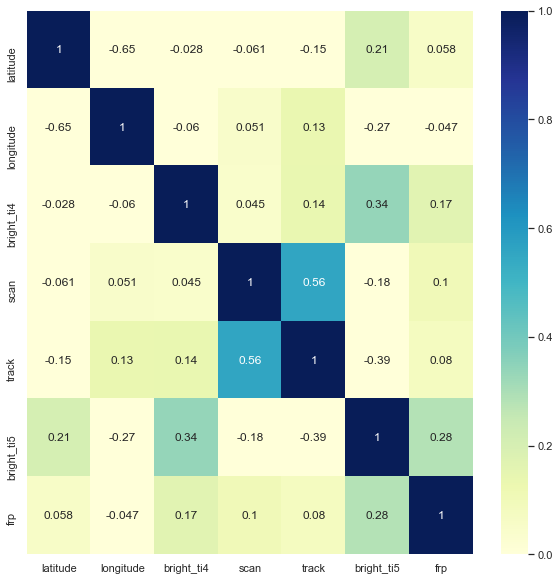

In [195]:
plt.figure(1)
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(raw_data.corr(method='pearson'),vmin=0,cmap="YlGnBu",annot=True,ax=ax)

BUG: CELLS DO NOT WORK ON GITHUB; INTERACTIVE VISUALS <br>
Tested working in Jupyter and VSCode <br>
Github renders images statically and does not support interactive visuals

In [196]:
# Write animation to file
fig2 = px.scatter_geo(raw_data, 
                    lat='latitude', 
                    lon='longitude', 
                    scope='asia',
                    center={'lat':2.2180,'lon':115.6628}, # centered to SEA
                    color='confidence',
                    animation_frame=raw_data['period'].astype(str)) 
fig2.write_html('content/animation.html')
# TODO: Fix animation to have constant legend 

# Display animation
IFrame(src='content/animation.html', width=1080, height=720)

In [197]:
## zq note: this one has opacity as frp, and the animation combines all the dots in one day

# Write animation to file
fig3 = px.scatter_geo(raw_data, 
                    lat='latitude', 
                    lon='longitude', 
                    scope='asia',
                    center={'lat':2.2180,'lon':115.6628}, # centered to SEA
                    color='confidence',
                    animation_frame=raw_data['acq_date'].astype(str),
                    opacity = (np.log(raw_data['frp']+1)/np.log(2)*0.01)) 
fig3.write_html('content/animation2.html')
# TODO: Fix animation to have constant legend 

# Display animation
IFrame(src='content/animation2.html', width=1080, height=720)


In [198]:
## zq note: this one has opacity as frp, and the animation combines all the dots in one da
# same as prev, just the colour is frp. This one is in the ppt

# Write animation to file
fig3 = px.scatter_geo(raw_data, 
                    lat='latitude', 
                    lon='longitude', 
                    scope='asia',
                    center={'lat':2.2180,'lon':115.6628}, # centered to SEA
                    color='frp',
                    animation_frame=raw_data['acq_date'].astype(str),
                    opacity = (np.log(raw_data['frp']+1)/np.log(2)*0.01)) 
fig3.write_html('content/animation3.html')
# TODO: Fix animation to have constant legend 

# Display animation
IFrame(src='content/animation3.html', width=1080, height=720)


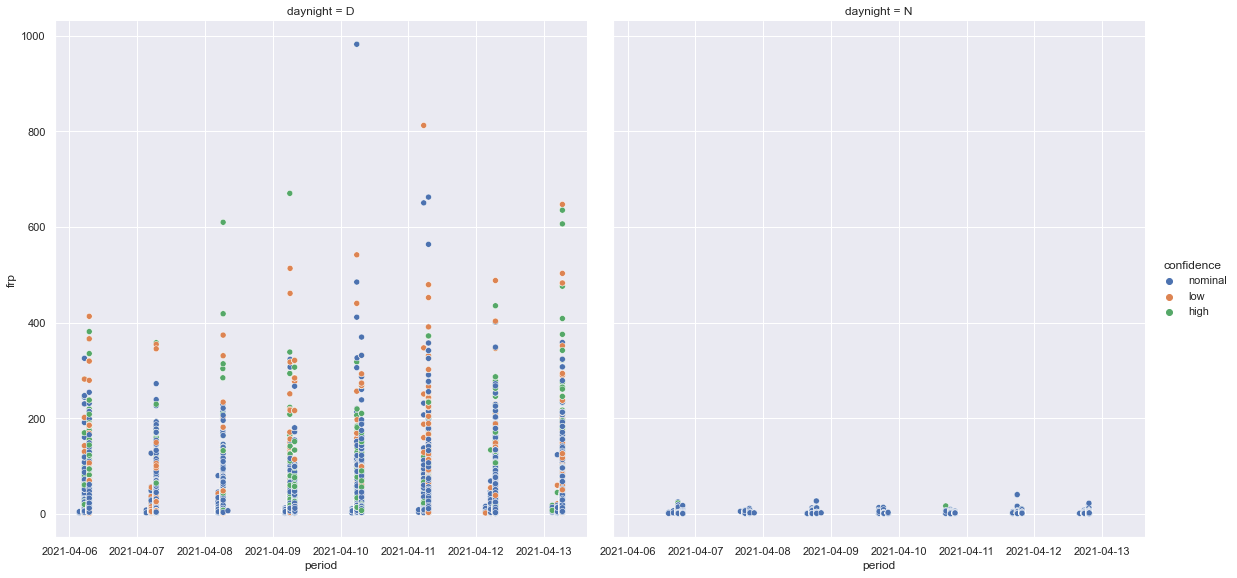

In [199]:
# FRP/confidence against time
sns_plot = sns.relplot(x="period", y="frp", hue="confidence", col="daynight", data=raw_data, height=8)

#sns_plot.savefig('temp.png', transparent=True)

We note that there seems to be some data where the gaps between data is small. Hence, this necessitates the merging of time data into hourly frames to better analyze patterns. 

In [200]:
# Processing data further to clean visualization

# Generate new DFs with times rounded down to the nearest hour
date_sorted = raw_data
date_sorted['period'] = date_sorted['period'].dt.floor('H')
date_sorted_gb = date_sorted.groupby('acq_date') # returns a groupby object which can be called with below code

# [date_sorted.get_group(x) for x in date_sorted_gb.groups] # this displays all the dataframes

date_sorted.head(10)

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,confidence,bright_ti5,frp,daynight,period
0,-9.42393,150.19067,338.6,0.38,0.36,2021-04-06,03:30:00,nominal,283.7,4.5,D,2021-04-06 03:00:00
1,-6.58918,146.84656,330.7,0.43,0.38,2021-04-06,03:30:00,nominal,293.1,2.1,D,2021-04-06 03:00:00
2,-6.35933,142.35457,328.9,0.53,0.50,2021-04-06,03:30:00,nominal,289.9,3.5,D,2021-04-06 03:00:00
3,-5.31813,142.20834,326.2,0.52,0.50,2021-04-06,03:30:00,nominal,287.4,4.6,D,2021-04-06 03:00:00
206,7.75488,122.44472,335.1,0.41,0.37,2021-04-06,05:12:00,nominal,298.4,10.4,D,2021-04-06 05:00:00
205,7.75147,122.44508,336.0,0.41,0.37,2021-04-06,05:12:00,nominal,298.0,10.4,D,2021-04-06 05:00:00
204,7.81045,122.85081,333.7,0.42,0.38,2021-04-06,05:12:00,nominal,293.3,2.6,D,2021-04-06 05:00:00
203,7.66033,122.30355,332.7,0.40,0.37,2021-04-06,05:12:00,nominal,298.2,2.2,D,2021-04-06 05:00:00
202,8.09629,125.35864,343.8,0.56,0.43,2021-04-06,05:12:00,nominal,300.7,19.9,D,2021-04-06 05:00:00
201,8.09232,125.35901,336.8,0.56,0.43,2021-04-06,05:12:00,nominal,298.6,5.5,D,2021-04-06 05:00:00


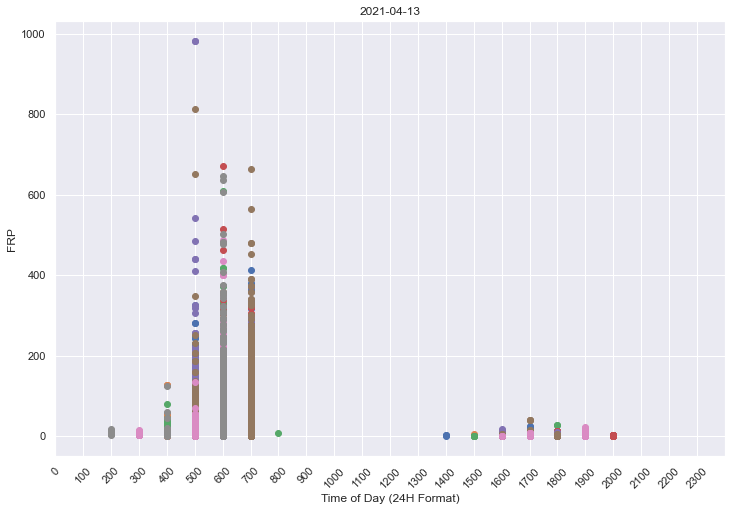

In [201]:
# Plot individual plots for every date
pd.options.mode.chained_assignment = None  # ignore warnings
# list_date = date_sorted['acq_date'].unique()

# Formatting of plot
fig3 = plt.figure(figsize=(12,8))
plt.xlabel('Time of Day (24H Format)')
plt.ylabel('FRP')
plt.xlim(0,2400)
plt.xticks(np.linspace(0,2300,num=24), rotation=45)

for x in date_sorted_gb.groups:
    plt.title(str(x.date()))

    # Data of plot
    current = date_sorted_gb.get_group(x) # iterate through groups
    current['acq_time'] = current['period'].dt.time # extract time
    current['acq_time'] = current['acq_time'].apply(str) # convert to type string
    current['acq_time'] = current['acq_time'].str.replace(':','').astype(int)/100 # convert to 24h format
    plt.scatter(current['acq_time'],current['frp'])
    plt.savefig('content/'+str(x.date())+'.png')

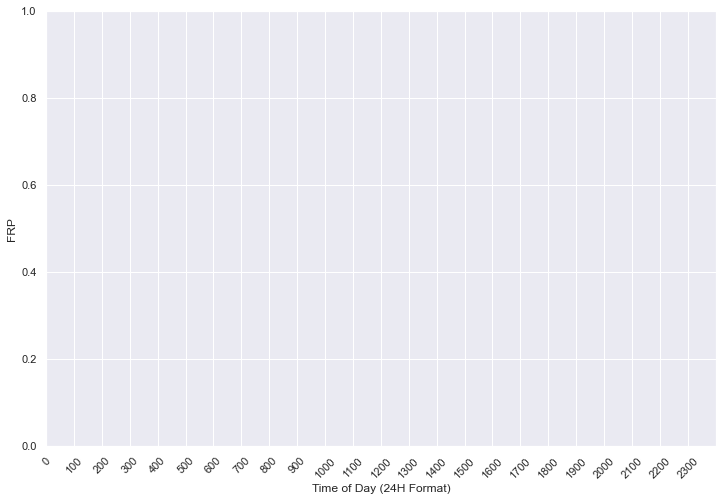

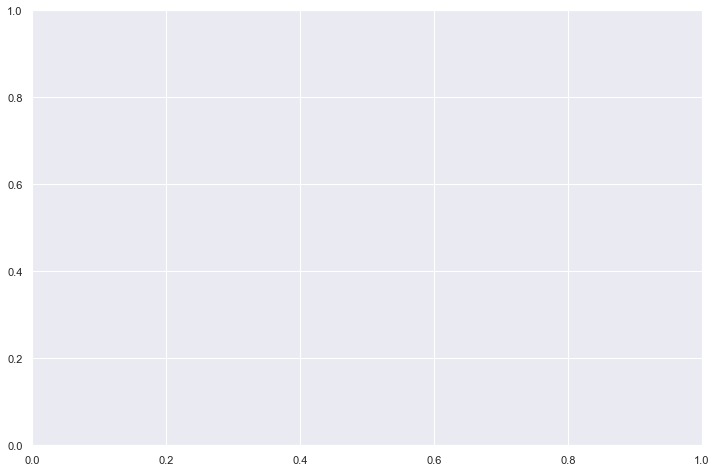

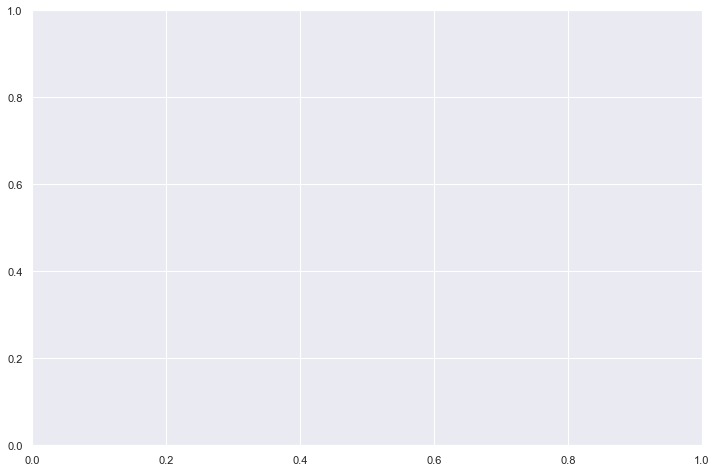

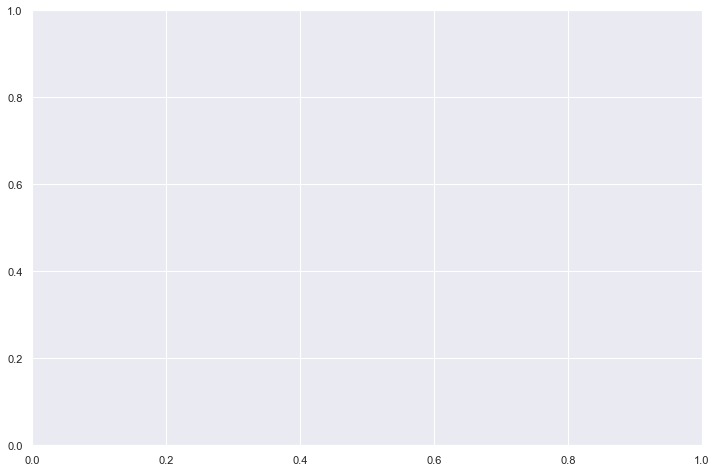

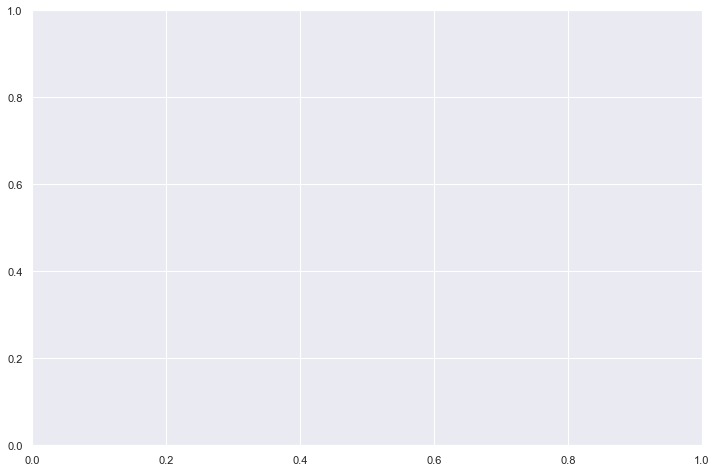

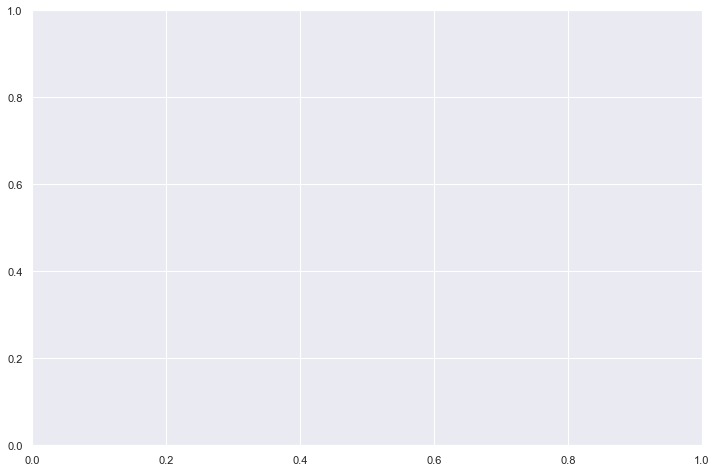

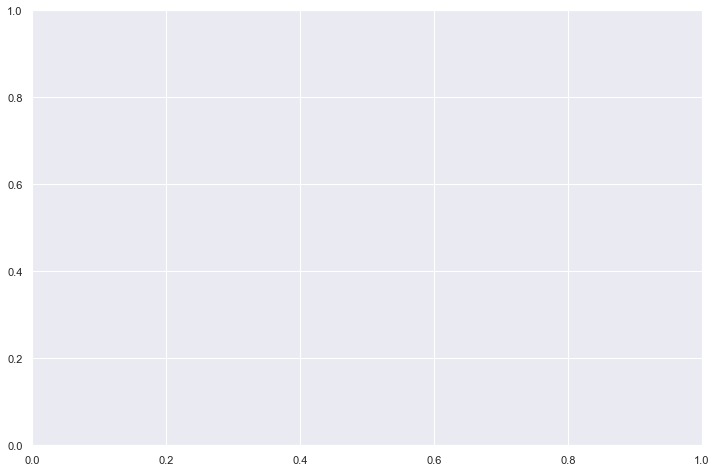

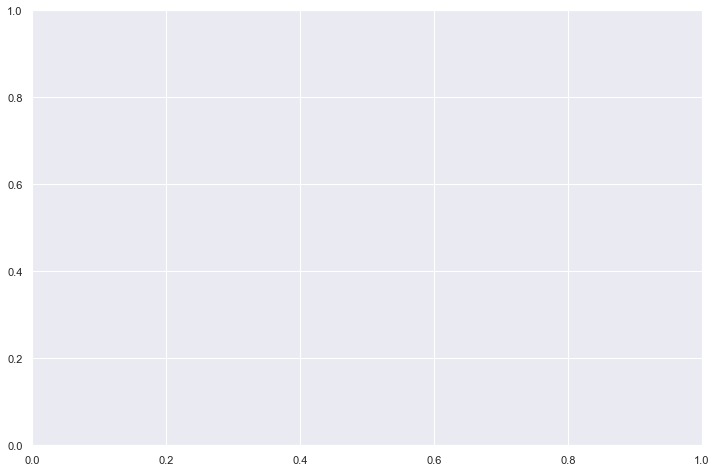

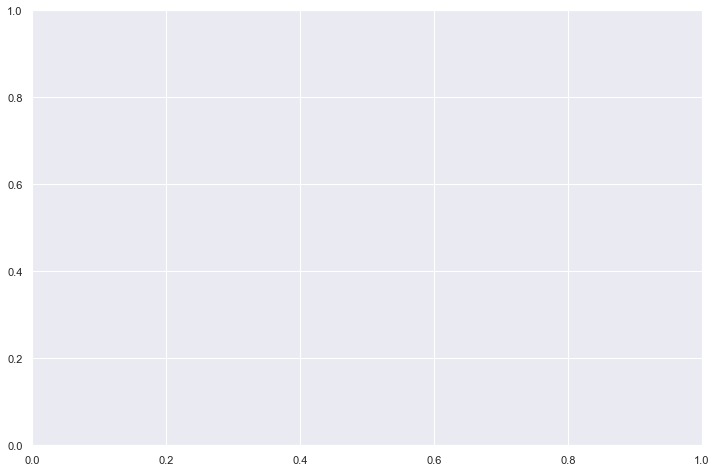

In [202]:
## This is the plot with each day's dots not accumulated for the next day - in the ppt
## delete? incorporate idk

# Formatting of plot
fig3 = plt.figure(figsize=(12,8))
plt.xlabel('Time of Day (24H Format)')
plt.ylabel('FRP')
plt.xlim(0,2400)
plt.xticks(np.linspace(0,2300,num=24), rotation=45)

for x in date_sorted_gb.groups:
    fig3 = plt.figure(figsize=(12,8))
    plt.xlabel('Time of Day (24H Format)')
    plt.ylabel('FRP')
    plt.xlim(0,2400)
    plt.xticks(np.linspace(0,2300,num=24), rotation=45)
    
    plt.title(str(x.date()))

    # Data of plot
    current = date_sorted_gb.get_group(x) # iterate through groups
    current['acq_time'] = current['period'].dt.time # extract time
    current['acq_time'] = current['acq_time'].apply(str) # convert to type string
    current['acq_time'] = current['acq_time'].str.replace(':','').astype(int)/100 # convert to 24h format
    plt.scatter(current['acq_time'],current['frp'])
    plt.savefig('content/'+str(x.date())+'.png')
    plt.cla()

In [203]:
filenames = date_sorted['acq_date'].dt.date.unique().astype(str)
filenames = [(value+'.png') for value in filenames]

images = []
for filename in filenames:
    images.append(imageio.imread('content/'+filename))
imageio.mimwrite('content/dailyfrp.gif', images, format='gif', duration=1)

Image(url='content/dailyfrp.gif') 

Looking at the above visualizations, we can observe varying trends, such as:
- concentration of fire data within the same region,
- highest number of fires detected in the day,
- patterns in when the fires are detected within the same 7 day period.


Additionally, we also notice the presence of points where the data is seemingly in the middle of the ocean.
Therefore, there is a need to filter the features of the data set to ensure the relevancy of the data in the following sections and models.

# 4 | Data Pre-Processing

### 4.1 | Reformatting Features
Certain columns need to be reformatted into their appropriate data type for analysis. 

In particular, we will be converting categorical data with multiple classfications into dummy variables where each category is a binary variable. To do so, we shall be using a tool known as OneHotEncoding (OHE).

Dummy Variables: https://stats.idre.ucla.edu/spss/faq/coding-systems-for-categorical-variables-in-regression-analysis-2/

In [204]:
# Convert 'object' columns into appropriate dtype
raw_data['confidence'].astype('category')
raw_data['daynight'].astype('category') 

0        D
1        D
2        D
3        D
206      D
        ..
42702    D
42703    D
42704    D
42691    D
45385    D
Name: daynight, Length: 45386, dtype: category
Categories (2, object): ['D', 'N']

In [205]:
# Convert time into integers
raw_data['acq_time'] = raw_data['acq_time'].apply(str) # convert to type string
raw_data['acq_time'] = raw_data['acq_time'].str.replace(':','').astype(int)
raw_data.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,confidence,bright_ti5,frp,daynight,period
0,-9.42393,150.19067,338.6,0.38,0.36,2021-04-06,33000,nominal,283.7,4.5,D,2021-04-06 03:00:00
1,-6.58918,146.84656,330.7,0.43,0.38,2021-04-06,33000,nominal,293.1,2.1,D,2021-04-06 03:00:00
2,-6.35933,142.35457,328.9,0.53,0.50,2021-04-06,33000,nominal,289.9,3.5,D,2021-04-06 03:00:00
3,-5.31813,142.20834,326.2,0.52,0.50,2021-04-06,33000,nominal,287.4,4.6,D,2021-04-06 03:00:00
206,7.75488,122.44472,335.1,0.41,0.37,2021-04-06,51200,nominal,298.4,10.4,D,2021-04-06 05:00:00


In [206]:
# Resetting index for OHE preparation
raw_data.set_index('period', inplace=True)
raw_data.reset_index(inplace=True)
raw_data.head()

,period,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,confidence,bright_ti5,frp,daynight
0,2021-04-06 03:00:00,-9.42393,150.19067,338.6,0.38,0.36,2021-04-06,33000,nominal,283.7,4.5,D
1,2021-04-06 03:00:00,-6.58918,146.84656,330.7,0.43,0.38,2021-04-06,33000,nominal,293.1,2.1,D
2,2021-04-06 03:00:00,-6.35933,142.35457,328.9,0.53,0.50,2021-04-06,33000,nominal,289.9,3.5,D
3,2021-04-06 03:00:00,-5.31813,142.20834,326.2,0.52,0.50,2021-04-06,33000,nominal,287.4,4.6,D
4,2021-04-06 05:00:00,7.75488,122.44472,335.1,0.41,0.37,2021-04-06,51200,nominal,298.4,10.4,D


## 4.2 | Processing the dataset 
For better analysis, we wanted to process and convert elements of the dataset such that we had more uniform types of features. We ended up with two different datasets to use in our model.




### 4.2.1 | Adding location information
As our dataset was limited in useful features, we wanted to add supplementary information. Using a geopandas package, we were able to get more information about the location of the fire using latitude and longitude. We were able to add information like the country, continent and estimated population of in the area, which could be useful features to determine the intensity of the fire.

In [207]:
# Converting latitude and longitude values to location values

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#gdf = gpd.GeoDataFrame(raw_data, geometry=gpd.points_from_xy(raw_data['longitude'], raw_data['latitude']), crs={'init': 'epsg:4326'})
gdf = gpd.GeoDataFrame(raw_data, geometry=gpd.points_from_xy(raw_data['longitude'], raw_data['latitude']), crs='epsg:4326')
location_data = gpd.sjoin(gdf, world, how='left')
location_data.head()  

,period,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,confidence,bright_ti5,frp,daynight,geometry,index_right,pop_est,continent,name,iso_a3,gdp_md_est
0,2021-04-06 03:00:00,-9.42393,150.19067,338.6,0.38,0.36,2021-04-06,33000,nominal,283.7,4.5,D,POINT (150.19067 -9.42393),NaN,NaN,NaN,NaN,NaN,NaN
1,2021-04-06 03:00:00,-6.58918,146.84656,330.7,0.43,0.38,2021-04-06,33000,nominal,293.1,2.1,D,POINT (146.84656 -6.58918),7.0,6909701.0,Oceania,Papua New Guinea,PNG,28020.0
2,2021-04-06 03:00:00,-6.35933,142.35457,328.9,0.53,0.50,2021-04-06,33000,nominal,289.9,3.5,D,POINT (142.35457 -6.35933),7.0,6909701.0,Oceania,Papua New Guinea,PNG,28020.0
3,2021-04-06 03:00:00,-5.31813,142.20834,326.2,0.52,0.50,2021-04-06,33000,nominal,287.4,4.6,D,POINT (142.20834 -5.31813),7.0,6909701.0,Oceania,Papua New Guinea,PNG,28020.0
4,2021-04-06 05:00:00,7.75488,122.44472,335.1,0.41,0.37,2021-04-06,51200,nominal,298.4,10.4,D,POINT (122.44472 7.75488),147.0,104256076.0,Asia,Philippines,PHL,801900.0


In [208]:
# Remove irrelevant geometric information and NaN values
location_data.drop(['geometry','index_right','iso_a3','gdp_md_est'],axis=1,inplace=True)
location_data.head()

,period,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,confidence,bright_ti5,frp,daynight,pop_est,continent,name
0,2021-04-06 03:00:00,-9.42393,150.19067,338.6,0.38,0.36,2021-04-06,33000,nominal,283.7,4.5,D,NaN,NaN,NaN
1,2021-04-06 03:00:00,-6.58918,146.84656,330.7,0.43,0.38,2021-04-06,33000,nominal,293.1,2.1,D,6909701.0,Oceania,Papua New Guinea
2,2021-04-06 03:00:00,-6.35933,142.35457,328.9,0.53,0.50,2021-04-06,33000,nominal,289.9,3.5,D,6909701.0,Oceania,Papua New Guinea
3,2021-04-06 03:00:00,-5.31813,142.20834,326.2,0.52,0.50,2021-04-06,33000,nominal,287.4,4.6,D,6909701.0,Oceania,Papua New Guinea
4,2021-04-06 05:00:00,7.75488,122.44472,335.1,0.41,0.37,2021-04-06,51200,nominal,298.4,10.4,D,104256076.0,Asia,Philippines


In [209]:
# Check for null values
location_data.isnull().sum()

period          0
latitude        0
longitude       0
bright_ti4      0
scan            0
track           0
acq_date        0
acq_time        0
confidence      0
bright_ti5      0
frp             0
daynight        0
pop_est       867
continent     867
name          867
dtype: int64

In [210]:
# Above means there are null values present. 
# Solution: remove rows
location_data.dropna(inplace=True)
location_data.reset_index(drop=True) # reset index of dataframe to account for missing values
location_data.isnull().sum()

period        0
latitude      0
longitude     0
bright_ti4    0
scan          0
track         0
acq_date      0
acq_time      0
confidence    0
bright_ti5    0
frp           0
daynight      0
pop_est       0
continent     0
name          0
dtype: int64

In [211]:
# Visualize clean dataset
location_data.head()

,period,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,confidence,bright_ti5,frp,daynight,pop_est,continent,name
1,2021-04-06 03:00:00,-6.58918,146.84656,330.7,0.43,0.38,2021-04-06,33000,nominal,293.1,2.1,D,6909701.0,Oceania,Papua New Guinea
2,2021-04-06 03:00:00,-6.35933,142.35457,328.9,0.53,0.50,2021-04-06,33000,nominal,289.9,3.5,D,6909701.0,Oceania,Papua New Guinea
3,2021-04-06 03:00:00,-5.31813,142.20834,326.2,0.52,0.50,2021-04-06,33000,nominal,287.4,4.6,D,6909701.0,Oceania,Papua New Guinea
4,2021-04-06 05:00:00,7.75488,122.44472,335.1,0.41,0.37,2021-04-06,51200,nominal,298.4,10.4,D,104256076.0,Asia,Philippines
5,2021-04-06 05:00:00,7.75147,122.44508,336.0,0.41,0.37,2021-04-06,51200,nominal,298.0,10.4,D,104256076.0,Asia,Philippines


In [212]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

ohe_confidence = pd.DataFrame(enc.fit_transform(location_data[['confidence']]).toarray())
ohe_confidence.columns = enc.get_feature_names(['confidence'])
#ohe_confidence.head()

ohe_daynight = pd.DataFrame(enc.fit_transform(location_data[['daynight']]).toarray())
ohe_daynight.columns = enc.get_feature_names(['daynight'])
# ohe_daynight.head()

ohe_continent = pd.DataFrame(enc.fit_transform(location_data[['continent']]).toarray())
ohe_continent.columns = enc.get_feature_names(['continent'])
# ohe_continent.head()

ohe_name = pd.DataFrame(enc.fit_transform(location_data[['name']]).toarray())
ohe_name.columns = enc.get_feature_names(['name'])
# ohe_name.head()


In [213]:
# Concatenate OHE variables with dataframe
main_data = pd.concat([location_data,ohe_confidence,ohe_daynight,ohe_continent,ohe_name], axis=1)
main_data.drop(['confidence', 'daynight','continent','name'], axis=1, inplace=True)
main_data.head()

,period,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,bright_ti5,frp,...,name_Indonesia,name_Laos,name_Malaysia,name_Myanmar,name_Nepal,name_Papua New Guinea,name_Philippines,name_Taiwan,name_Thailand,name_Vietnam
0,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2021-04-06 03:00:00,-6.58918,146.84656,330.7,0.43,0.38,2021-04-06,33000.0,293.1,2.1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2021-04-06 03:00:00,-6.35933,142.35457,328.9,0.53,0.50,2021-04-06,33000.0,289.9,3.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2021-04-06 03:00:00,-5.31813,142.20834,326.2,0.52,0.50,2021-04-06,33000.0,287.4,4.6,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2021-04-06 05:00:00,7.75488,122.44472,335.1,0.41,0.37,2021-04-06,51200.0,298.4,10.4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [214]:
# Check datatypes of new dataframe
main_data.dtypes

period                   datetime64[ns]
latitude                        float64
longitude                       float64
bright_ti4                      float64
scan                            float64
track                           float64
acq_date                 datetime64[ns]
acq_time                        float64
bright_ti5                      float64
frp                             float64
pop_est                         float64
confidence_high                 float64
confidence_low                  float64
confidence_nominal              float64
daynight_D                      float64
daynight_N                      float64
continent_Asia                  float64
continent_Oceania               float64
name_Bangladesh                 float64
name_Bhutan                     float64
name_Brunei                     float64
name_Cambodia                   float64
name_China                      float64
name_India                      float64
name_Indonesia                  float64


In [215]:
# Standardization can only be done on numeric data - hence, columns not of int or float type should be removed.
main_data.drop(['period','acq_date','latitude','longitude'],axis=1,inplace=True)
main_data.dtypes

bright_ti4               float64
scan                     float64
track                    float64
acq_time                 float64
bright_ti5               float64
frp                      float64
pop_est                  float64
confidence_high          float64
confidence_low           float64
confidence_nominal       float64
daynight_D               float64
daynight_N               float64
continent_Asia           float64
continent_Oceania        float64
name_Bangladesh          float64
name_Bhutan              float64
name_Brunei              float64
name_Cambodia            float64
name_China               float64
name_India               float64
name_Indonesia           float64
name_Laos                float64
name_Malaysia            float64
name_Myanmar             float64
name_Nepal               float64
name_Papua New Guinea    float64
name_Philippines         float64
name_Taiwan              float64
name_Thailand            float64
name_Vietnam             float64
dtype: obj

In [216]:
main_data.dropna(inplace=True)

In [217]:
#create a dataset to reference to
data_mixed = main_data.copy()
data_mixed.to_csv('./data_mixed.csv',index=False)

In [218]:
data_mixed.head()

,bright_ti4,scan,track,acq_time,bright_ti5,frp,pop_est,confidence_high,confidence_low,confidence_nominal,...,name_Indonesia,name_Laos,name_Malaysia,name_Myanmar,name_Nepal,name_Papua New Guinea,name_Philippines,name_Taiwan,name_Thailand,name_Vietnam
1,330.7,0.43,0.38,33000.0,293.1,2.1,6909701.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,328.9,0.53,0.50,33000.0,289.9,3.5,6909701.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,326.2,0.52,0.50,33000.0,287.4,4.6,6909701.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,335.1,0.41,0.37,51200.0,298.4,10.4,104256076.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,336.0,0.41,0.37,51200.0,298.0,10.4,104256076.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### 4.2.2 | Converting continuous features into categorical features
To make the model more accurate, we attempted to convert continuous features into categorical features by splitting the datapoints into 5 bins of equally spaced out ranges of continuous data. We will then use OHE to convert these bins into dummy variables. This is so that we can simplify and standardize the type of features which is fed to the models by converting all the features (X) to binary variables. We will be training our models using this preprocessed fully categorical dataset, as well as the mixed continous-categorical dataset.

In [219]:
# Generate labels for modified dataset
mod_var = [[],[],[],[],[],[]]
var = ['bright_ti4','scan','track','bright_ti5','pop_est']
quantile = ['_20p','_40p','_60p','_80p','_100p']
quartile = ['_25p','_50p','_75p','_100p']

for x in range(len(var)):
    mod_var[x] = [var[x] + value for value in quantile]
    print (mod_var[x])
mod_var[-1]=['acq_time'+value for value in quartile]
print (mod_var[-1])

['bright_ti4_20p', 'bright_ti4_40p', 'bright_ti4_60p', 'bright_ti4_80p', 'bright_ti4_100p']
['scan_20p', 'scan_40p', 'scan_60p', 'scan_80p', 'scan_100p']
['track_20p', 'track_40p', 'track_60p', 'track_80p', 'track_100p']
['bright_ti5_20p', 'bright_ti5_40p', 'bright_ti5_60p', 'bright_ti5_80p', 'bright_ti5_100p']
['pop_est_20p', 'pop_est_40p', 'pop_est_60p', 'pop_est_80p', 'pop_est_100p']
['acq_time_25p', 'acq_time_50p', 'acq_time_75p', 'acq_time_100p']


In [220]:
# Convert input to categorical input

data_bright_ti4,data_bright_ti4_intervals=pd.qcut(main_data['bright_ti4'], 5, retbins=True,
                        labels=mod_var[0])
data_scan,data_scan_intervals=pd.qcut(main_data['scan'], 5, retbins=True,
                        labels=mod_var[1])
data_track,data_track_intervals=pd.qcut(main_data['track'], 5, retbins=True,
                        labels=mod_var[2])
data_bright_ti5,data_bright_ti5_intervals=pd.qcut(main_data['bright_ti5'], 5, retbins=True,
                        labels=mod_var[3])
#data_pop_est,data_pop_est_intervals=pd.qcut(main_data['pop_est'], 5, retbins=True,
#                        labels=mod_var[4])
data_acq_time,data_acq_time_intervals=pd.qcut(main_data['acq_time'], 4, retbins=True,
                        labels=mod_var[5])

In [221]:
#Concatenate all to a single DF
#cont_var = pd.concat([data_bright_ti4,data_scan,data_track,data_bright_ti5,data_pop_est,data_acq_time], axis=1)
cont_var = pd.concat([data_bright_ti4,data_scan,data_track,data_bright_ti5,data_acq_time], axis=1)

In [222]:
cont_var.dropna(inplace= True)

In [223]:
# One-Hot Encoding
ohe_bright_ti4 = pd.DataFrame(enc.fit_transform(cont_var[['bright_ti4']]).toarray())
ohe_bright_ti4.columns = enc.get_feature_names(['bright_ti4'])

ohe_scan = pd.DataFrame(enc.fit_transform(cont_var[['scan']]).toarray())
ohe_scan.columns = enc.get_feature_names(['scan'])

ohe_track = pd.DataFrame(enc.fit_transform(cont_var[['track']]).toarray())
ohe_track.columns = enc.get_feature_names(['track'])

ohe_bright_ti5 = pd.DataFrame(enc.fit_transform(cont_var[['bright_ti5']]).toarray())
ohe_bright_ti5.columns = enc.get_feature_names(['bright_ti5'])

#ohe_pop_est = pd.DataFrame(enc.fit_transform(cont_var[['pop_est']]).toarray())
#ohe_pop_est.columns = enc.get_feature_names(['pop_est'])

ohe_acq_time = pd.DataFrame(enc.fit_transform(cont_var[['acq_time']]).toarray())
ohe_acq_time.columns = enc.get_feature_names(['acq_time'])

In [224]:
main_data.drop(['bright_ti4','scan','track','acq_time','bright_ti5','pop_est'],axis=1,inplace=True)
#main_data = pd.concat([ohe_bright_ti4,ohe_scan,ohe_track,ohe_bright_ti5,ohe_pop_est,ohe_acq_time,main_data],axis=1)
main_data = pd.concat([ohe_bright_ti4,ohe_scan,ohe_track,ohe_bright_ti5,ohe_acq_time,main_data],axis=1)

In [225]:
main_data.head()

,bright_ti4_bright_ti4_100p,bright_ti4_bright_ti4_20p,bright_ti4_bright_ti4_40p,bright_ti4_bright_ti4_60p,bright_ti4_bright_ti4_80p,scan_scan_100p,scan_scan_20p,scan_scan_40p,scan_scan_60p,scan_scan_80p,...,name_Indonesia,name_Laos,name_Malaysia,name_Myanmar,name_Nepal,name_Papua New Guinea,name_Philippines,name_Taiwan,name_Thailand,name_Vietnam
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [226]:
main_data.dropna(inplace=True)

In [227]:
#create a dataset to reference to
data_binned = main_data.copy()
data_binned.to_csv('./data_binned.csv',index=False) 

In [228]:
data_binned.head()

,bright_ti4_bright_ti4_100p,bright_ti4_bright_ti4_20p,bright_ti4_bright_ti4_40p,bright_ti4_bright_ti4_60p,bright_ti4_bright_ti4_80p,scan_scan_100p,scan_scan_20p,scan_scan_40p,scan_scan_60p,scan_scan_80p,...,name_Indonesia,name_Laos,name_Malaysia,name_Myanmar,name_Nepal,name_Papua New Guinea,name_Philippines,name_Taiwan,name_Thailand,name_Vietnam
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### 4.2.3 | Dataset Summary
With that, we have 2 preprocessed datasets that we can use to train our models:


1.   Mixed Dataset - Binary Features + Continuous Features Mix
2.   Binned Dataset - All Binary Features



## 4.3 | Feature Selection

With our two pre-processed datasets, we shall do some feature selection to make our models run faster and smoother. 

In [229]:
# Mixed Dataset
Xmix = data_mixed.drop(['frp'], axis=1)
ymix = pd.DataFrame(data_mixed['frp'])

# Binned Dataset
Xbin = data_binned.drop(['frp'], axis=1)
ybin = pd.DataFrame(data_binned['frp'])

### 4.3.1 | Covariance Matrix + Heatmap

Covariance Matrix for Mixed Dataset

To generate the covariance matrix for the mixed dataset, we first standardize the variables with z-scoring such that the spread of each variable is comparable to each other.

In [230]:
##z-scoring standardization

from sklearn.preprocessing import StandardScaler, Normalizer
def standardize(df):
  # create a scaler object
  std_scaler = StandardScaler()
  # fit and transform the data
  return pd.DataFrame(std_scaler.fit_transform(df), columns=df.columns)


X_cleaned  = standardize(data_mixed)
X_cleaned.head()

,bright_ti4,scan,track,acq_time,bright_ti5,frp,pop_est,confidence_high,confidence_low,confidence_nominal,...,name_Indonesia,name_Laos,name_Malaysia,name_Myanmar,name_Nepal,name_Papua New Guinea,name_Philippines,name_Taiwan,name_Thailand,name_Vietnam
0,-0.371166,-0.342873,-0.763579,-1.151682,-0.688348,-0.391325,-0.502725,-0.213611,-0.362898,0.436449,...,-0.1084,-0.448479,-0.049337,-0.87808,-0.009573,38.133100,-0.197759,-0.024877,-0.179864,-0.275037
1,-0.488434,0.903371,0.308466,-1.151682,-1.090229,-0.349112,-0.502725,-0.213611,-0.362898,0.436449,...,-0.1084,-0.448479,-0.049337,-0.87808,-0.009573,38.133100,-0.197759,-0.024877,-0.179864,-0.275037
2,-0.664336,0.778747,0.308466,-1.151682,-1.404199,-0.315944,-0.502725,-0.213611,-0.362898,0.436449,...,-0.1084,-0.448479,-0.049337,-0.87808,-0.009573,-0.026224,5.056648,-0.024877,-0.179864,-0.275037
3,-0.084510,-0.592121,-0.852916,-0.697648,-0.022732,-0.141060,-0.271081,-0.213611,-0.362898,0.436449,...,-0.1084,-0.448479,-0.049337,-0.87808,-0.009573,-0.026224,5.056648,-0.024877,-0.179864,-0.275037
4,-0.025876,-0.592121,-0.852916,-0.697648,-0.072967,-0.141060,-0.271081,-0.213611,-0.362898,0.436449,...,-0.1084,-0.448479,-0.049337,-0.87808,-0.009573,-0.026224,5.056648,-0.024877,-0.179864,-0.275037


<Figure size 432x288 with 0 Axes>

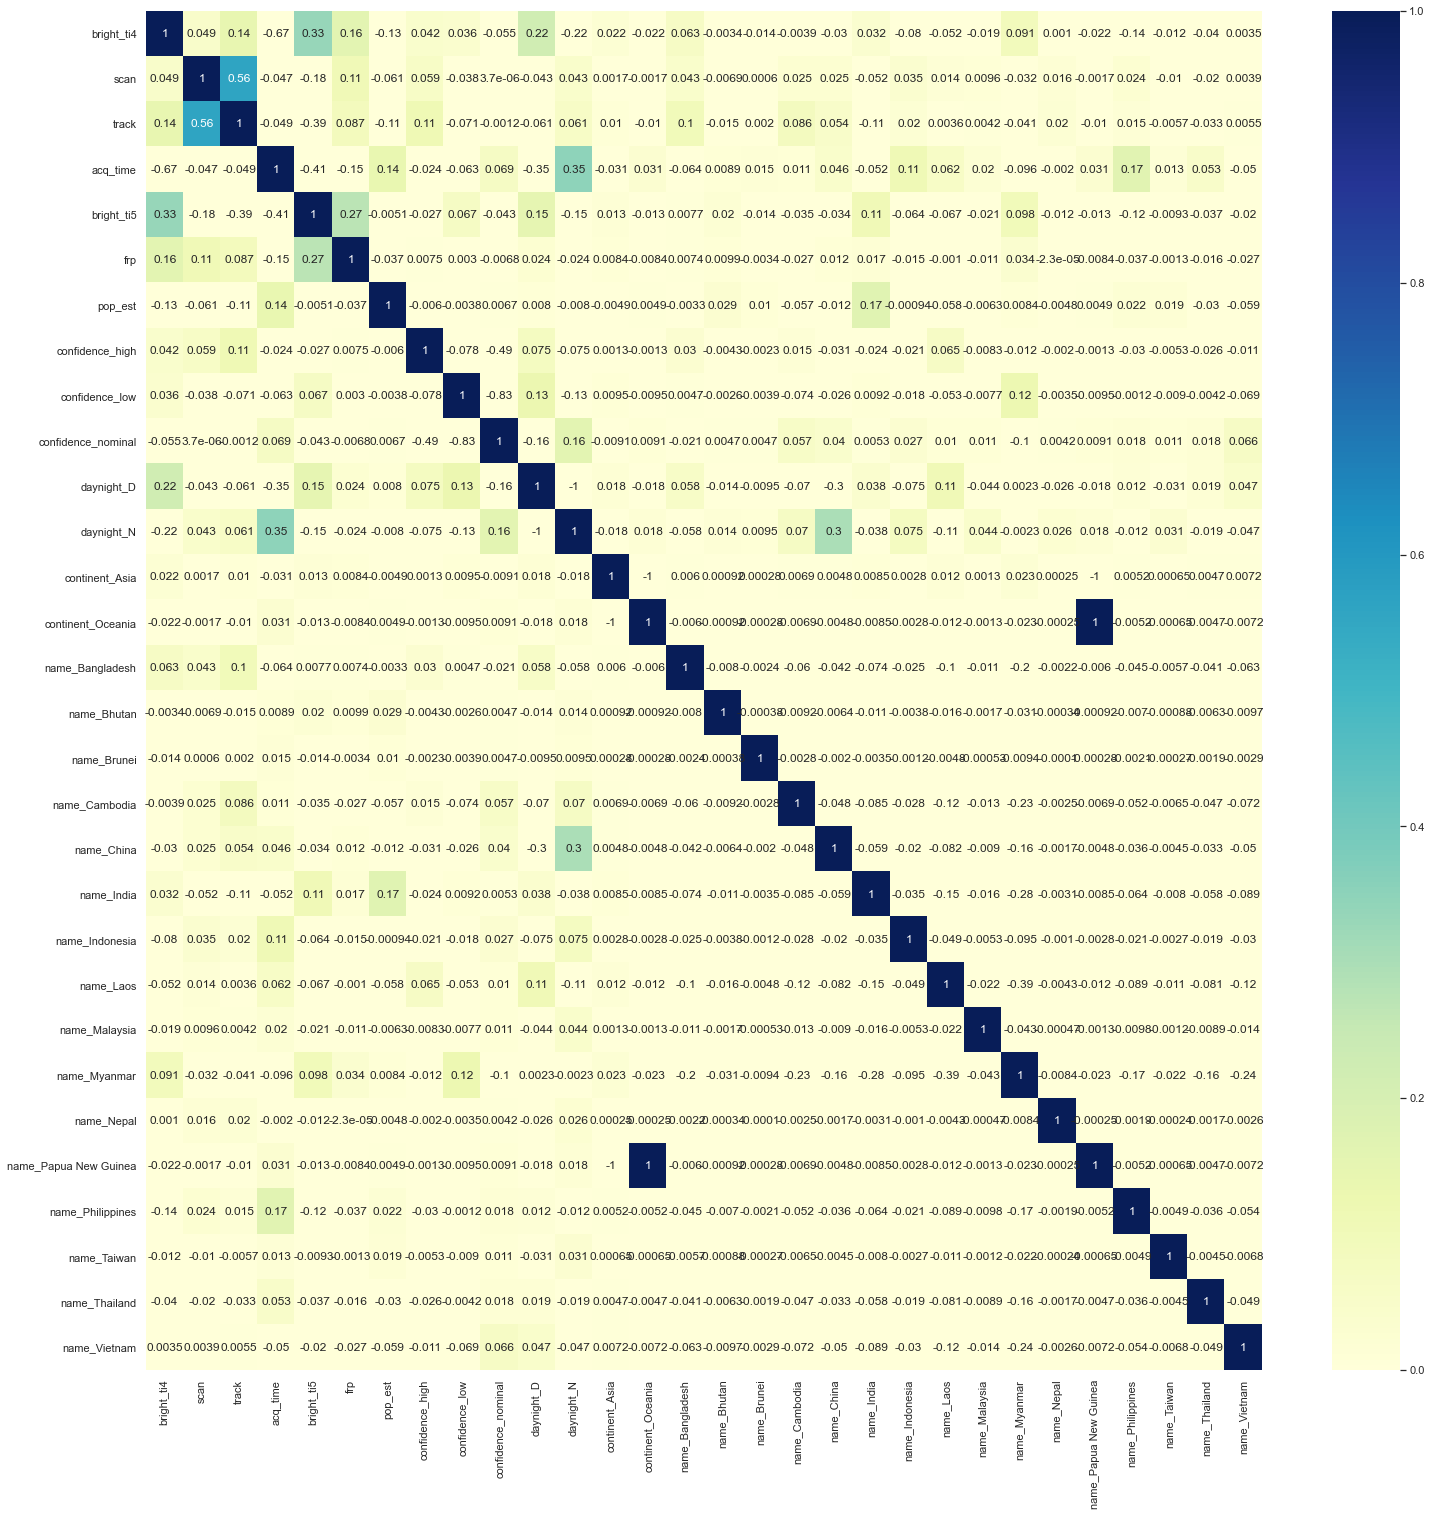

In [231]:
Xdata = X_cleaned.copy()
plt.figure(1)
fig, ax = plt.subplots(figsize=(25,25)) 
sns.set()
ax = sns.heatmap(Xdata.corr(method='pearson'),vmin=0,cmap="YlGnBu",annot=True,ax=ax)

From the heatmap, we can see three strong co-relations which we can investigate:


1.   Strong corelation between scan and track of 0.53*. This is expected as scan and track are factors which indicate the angle and position which the satelite was at in relation to the ground position when taking the reading.
2.  Corelation between bright_ti4, bright_ti5 and frp values of around 0.2*. This makes sense as fires give off light in addition to heat. A more intense fire with a higher frp value is expected to give off more light and affect the bright_ti4 and bright_ti5 values. Bright_ti4 and Bright_ti5 represent different channels of light detection in this case.
3. Acq_time and Day_night of 0.32*. There is obvious relation there as the Acq_time (which is in UTC+0) is the sole factor in indicating whether the reading was taken at night or in the day. 

Out of all these relations, we would like to explore the relationship between brightness values and frp values for our project.

We also note that most of the variables are independent of each other, which is ideal for choosing dimensions which do not overlap for our function.


**values might be subject to change due to the dynamic updating of our dataset*


---
Covariance Matrix for Binned Dataset

To generate the covariance matrix for the binned dataset, the binary variables are compared to each other. 

<Figure size 432x288 with 0 Axes>

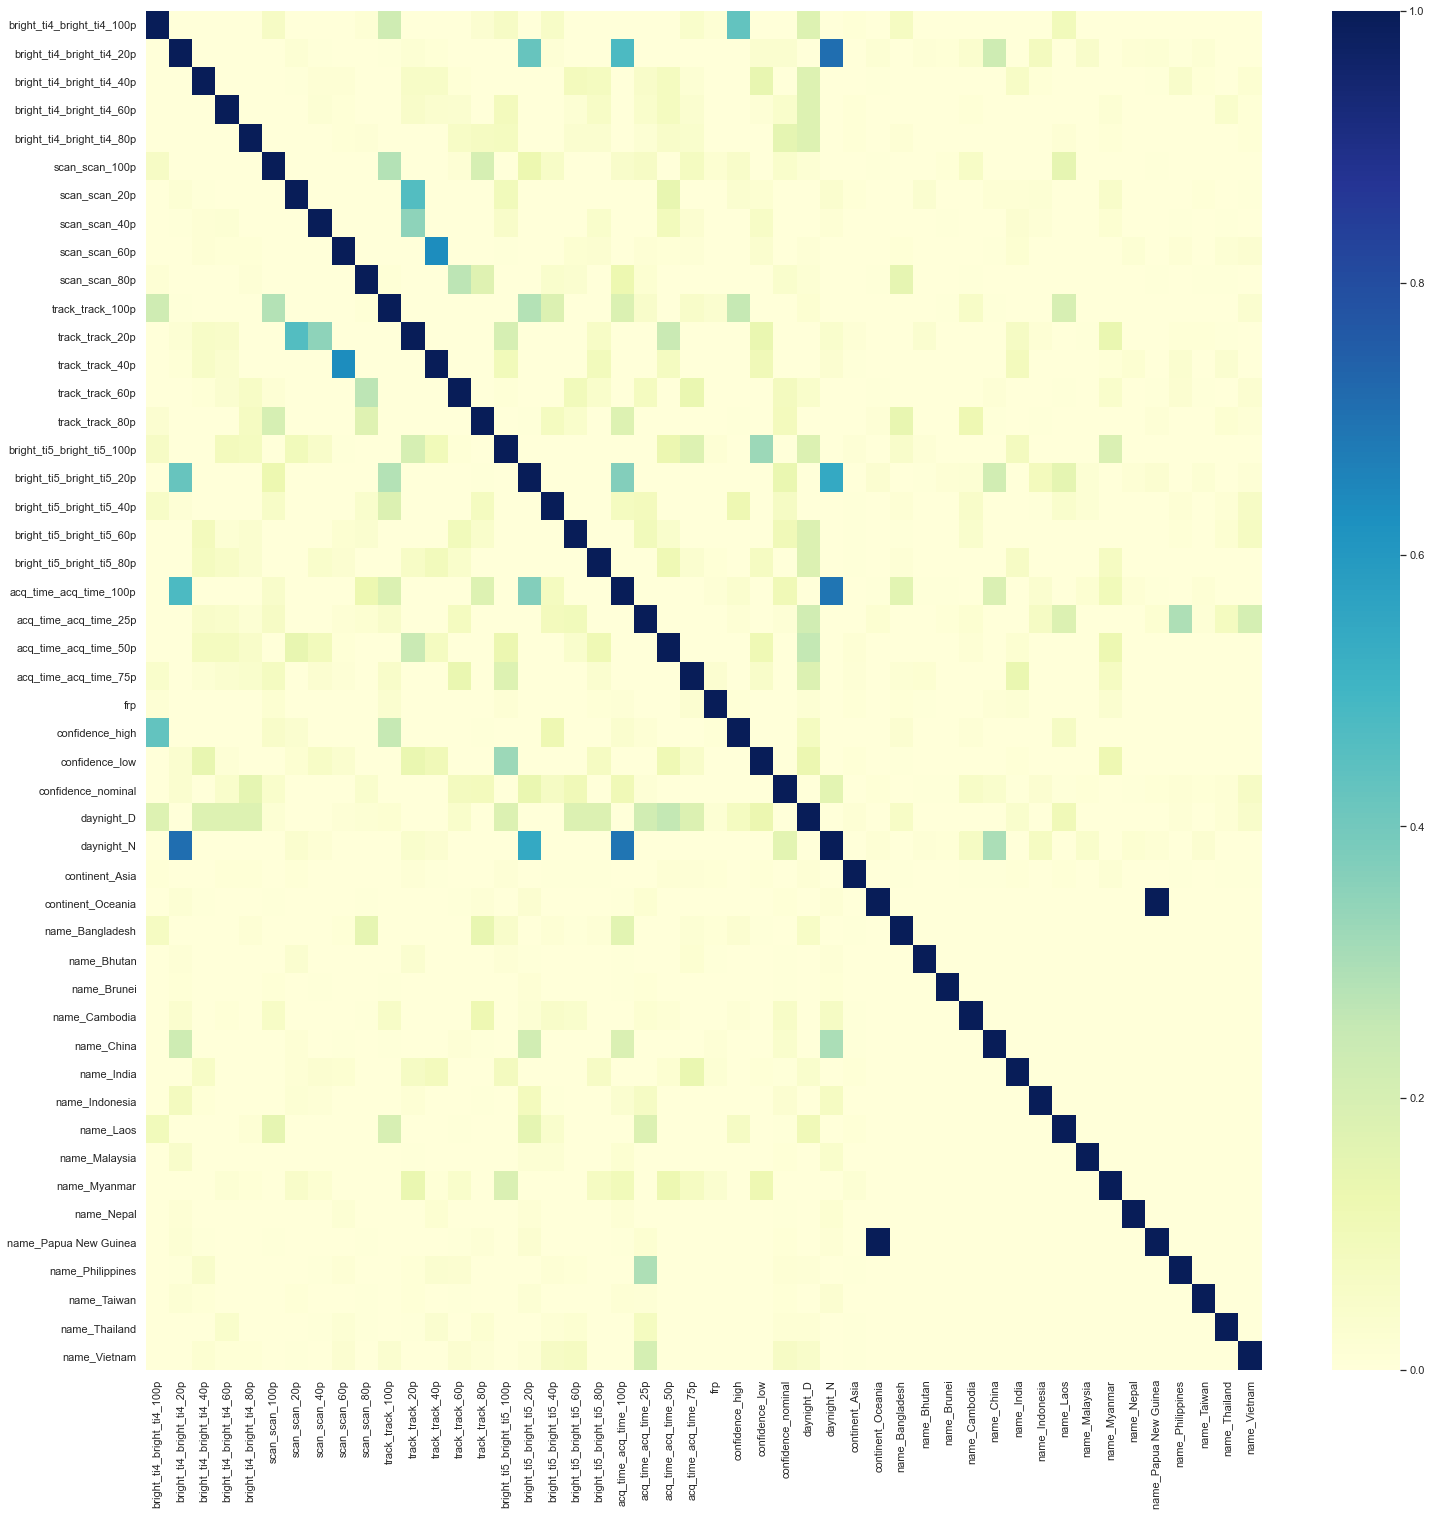

In [232]:
Xdata = data_binned
plt.figure(1)
fig, ax = plt.subplots(figsize=(25,25)) 
sns.set()
ax = sns.heatmap(Xdata.corr(method='pearson'),vmin=0,cmap="YlGnBu",annot=False,ax=ax)

### 4.3.2 | Random Forest Model

Another model we utilised is the Random Forest model, which comprises of a user-determined number of decision trees. 

It works through the following steps:
1. A random sample is selected from the given dataset.
2. From this random sample, a decision tree is crafted. Assuming there are n random samples selected, there will be n decision trees. (The argument n_estimators allows the user to choose the value of n.)
3. When the Random Forest model makes a prediction, each decision tree will then produce a predicted result. Voting will commence for all n decision trees.
4. Once all n predicted results have been voted upon, the highest voted result is the final prediction.

The model has proven to be both accurate and robust due to the number of decision trees involved; additionally, due to it taking the average of all predictions by the decision trees, it is not affected by overfitting.

Sources: 
- [Random Forest in Python](https://towardsdatascience.com/random-forest-in-python-24d0893d51c0)
- [Understanding Random Forests Classifiers in Python](https://www.datacamp.com/community/tutorials/random-forests-classifier-python)

In [233]:
##convert to numpy to use with randomforest

X = Xmix
y = ymix

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 20 decision trees
rf = RandomForestRegressor(n_estimators = 20, random_state = 42)
# Train the model on training data
rf.fit(X.values, y.values.ravel());

# get importance
importance = rf.feature_importances_
# print(importance)
# summarize feature importance
important_features_dict = {}
for i,v in enumerate(importance):
    important_features_dict[X.columns[i]] = v

sorted_values = sorted(important_features_dict.values(),reverse=True) # Sort the values
sorted_dict = {}

for i in sorted_values:
    for k in important_features_dict.keys():
        if important_features_dict[k] == i:
            sorted_dict[k] = important_features_dict[k]
            break
         
toplist = []
for i in sorted_dict:
    #print(i,sorted_dict[i])
    toplist.append(i)

first3vals = toplist[:3]
print("The top 3 factors correlating to the Fire Radiative Power are %s, %s, %s" % ( first3vals[0], first3vals[1] , first3vals[2] ))

The top 3 factors correlating to the Fire Radiative Power are bright_ti5, bright_ti4, scan


# 5 | Data Analysis - Supervised Learning Models
In this section, we shall be using our dataset to train three different models to attempt to predict a value of FRP (Fire Radiative Power). Fire Radiative Power is the detected thermal energy of the fire, which is indicative of the size and intensity of the wildfire.

<p> From the feature selection, the relevant features that we are using to predict FRP values would be bright_ti4 and bright_ti5, and a high confidence of ths satelite in the conditions for measurement.

In [234]:
#place datasets here
#datasets after feature selection

#TO-DO : standardize the continuous data (extracat out and then reattach to the binary variables.)
#data_xs_mixed = standardize(data_mixed[[first3vals[0], first3vals[1] , first3vals[2] ]])
#data_y_mixed = standardize(data_mixed[['frp']])

data_xs_mixed = data_mixed[[first3vals[0], first3vals[1] , first3vals[2] ]]
data_y_mixed = data_mixed[['frp']]

data_xs_binned = data_binned.drop(['frp'], axis=1)
data_y_binned = data_binned[['frp']]

In [235]:
#separate into multiple cells 
data_xs_mixed.head()

,bright_ti5,bright_ti4,scan
1,293.1,330.7,0.43
2,289.9,328.9,0.53
3,287.4,326.2,0.52
4,298.4,335.1,0.41
5,298.0,336.0,0.41


In [236]:
data_xs_mixed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43654 entries, 1 to 44518
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bright_ti5  43654 non-null  float64
 1   bright_ti4  43654 non-null  float64
 2   scan        43654 non-null  float64
dtypes: float64(3)
memory usage: 1.3 MB


In [237]:
data_y_mixed.head()

,frp
1,2.1
2,3.5
3,4.6
4,10.4
5,10.4


In [238]:
data_y_mixed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43654 entries, 1 to 44518
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   frp     43654 non-null  float64
dtypes: float64(1)
memory usage: 682.1 KB


In [239]:
data_xs_binned.head(5)

,bright_ti4_bright_ti4_100p,bright_ti4_bright_ti4_20p,bright_ti4_bright_ti4_40p,bright_ti4_bright_ti4_60p,bright_ti4_bright_ti4_80p,scan_scan_100p,scan_scan_20p,scan_scan_40p,scan_scan_60p,scan_scan_80p,...,name_Indonesia,name_Laos,name_Malaysia,name_Myanmar,name_Nepal,name_Papua New Guinea,name_Philippines,name_Taiwan,name_Thailand,name_Vietnam
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [240]:
data_xs_binned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42790 entries, 1 to 43653
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   bright_ti4_bright_ti4_100p  42790 non-null  float64
 1   bright_ti4_bright_ti4_20p   42790 non-null  float64
 2   bright_ti4_bright_ti4_40p   42790 non-null  float64
 3   bright_ti4_bright_ti4_60p   42790 non-null  float64
 4   bright_ti4_bright_ti4_80p   42790 non-null  float64
 5   scan_scan_100p              42790 non-null  float64
 6   scan_scan_20p               42790 non-null  float64
 7   scan_scan_40p               42790 non-null  float64
 8   scan_scan_60p               42790 non-null  float64
 9   scan_scan_80p               42790 non-null  float64
 10  track_track_100p            42790 non-null  float64
 11  track_track_20p             42790 non-null  float64
 12  track_track_40p             42790 non-null  float64
 13  track_track_60p             427

In [241]:
data_y_binned.head(5)

,frp
1,2.1
2,3.5
3,4.6
4,10.4
5,10.4


In [242]:
data_y_binned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42790 entries, 1 to 43653
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   frp     42790 non-null  float64
dtypes: float64(1)
memory usage: 668.6 KB


Dataset: Mixed


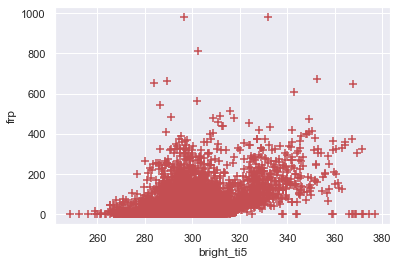

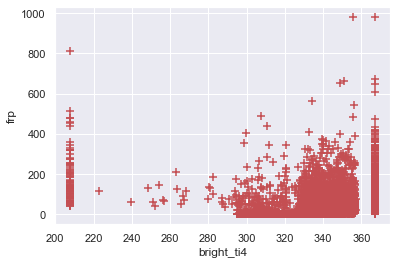

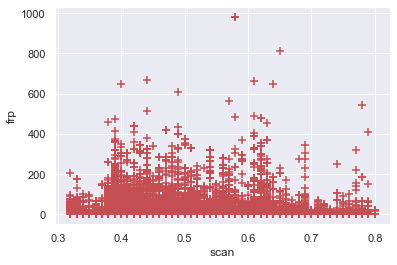

<Figure size 432x288 with 0 Axes>

In [243]:
#Visualization of our cleaned dataset, for continous variables
def scatterplot_XY(x, y, x_label):
  plt.scatter(x, y, s=60, c='r', marker='+', label='Class0')
  #plt.xlabel(x.keys())
  plt.ylabel('frp') 
  plt.xlabel(x_label)
  plt.show()
  plt.clf()

def viz_data(data_xs, data_y, dataset_name = "Dataset"):
  print("Dataset:", dataset_name)
  for column in data_xs:
    x= data_xs[column]
    y = data_y
    scatterplot_XY(x, y, column)

viz_data(data_xs_mixed, data_y_mixed, "Mixed")
#viz_data(data_xs_binned, data_y_binned, "Binned")

In [244]:
#visualize binary data
#TO DO, or TO DELETE: categorical data visualization. 
#sns.relplot(kind ='bubble', x = data_xs['confidence_high'], y = data_y)
##sns.scatterplot(data=data, x="gdpPercap", y="lifeExp", size="pop", legend=False, sizes=data_xs)

#dfviolin = pd.DataFrame([data_xs['confidence_high'].values, data_y.values]).transpose()
#dfviolin = pd.DataFrame(data=np.concatenate((data_xs['confidence_high'],y_pred),axis=1), columns=["Actual","Predicted"])

#print(dfviolin[:5])

#sns.violinplot(data = dfviolin, x='0', y = '1')

Dataset: Mixed


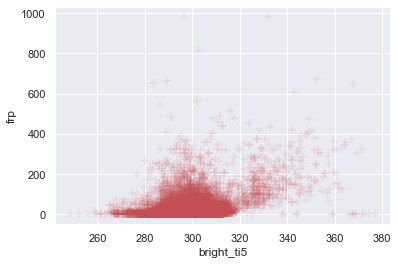

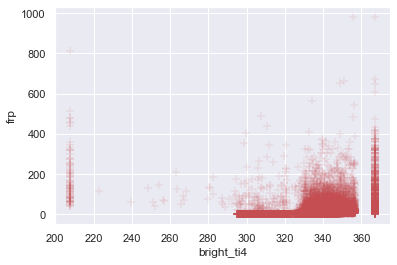

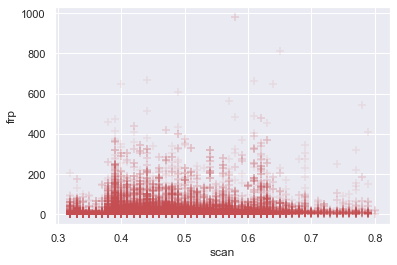

<Figure size 432x288 with 0 Axes>

In [245]:
# due to the high density of our points, we shall reduce their opacity and visualize them in terms of density
#visualization
def scatterplot_XY(x, y,x_label = "x_variable"):
  plt.scatter(x, y, s=60, c='r', marker='+', alpha = 0.1, label='Class0')
  #plt.xlabel(x.keys())
  plt.ylabel('frp') 
  plt.xlabel(x_label)
  plt.show()
  plt.clf()

viz_data(data_xs_mixed, data_y_mixed, "Mixed")

## 5.1 | Approach
This is a regression problem, where we are attempting to predict a continous variable y = FRP, from 3 different features X = ['bright_ti4', 'bright_ti5', 'confidence_high']

We will be applying 3 different regression models to attempt to quantify a relationship between the X and y variables. The models are: 
1.   Linear Regression
2.   Polynomial Regression
3.   Random Forest




In [246]:
#create empty dataframe to store the model accuracies
df_accuracy = pd.DataFrame(columns=['Model Name','DataSet','Type of Model','X_features','y_target','Accuracy','Loss', 'Reg/w'])

### 5.1.1 | Train-Validation-Test Split

Before we work on the dataset, we are going to split the dataset into train sets and test sets. The train set will be used for creating and fitting our model parameters, while the test data is used to evaluate the accuracy and effectiveness of our model for predicting FRP values. 

For models that have hyperparameters to be calibrated, we shall also split the train set from above into train-validation sets and conduct cross-fold validation to calibrate the hyperparameters.

In [247]:
#train-test split, WRAPPER FUNCTION   
from sklearn.model_selection import train_test_split
def train_test_s(data_xs, data_y, dataset_name = "Dataset"):
  print("Dataset:", dataset_name)
  X_train, X_test, y_train, y_test = train_test_split(data_xs, data_y, test_size=0.2, random_state=0)
  print("Shape of Train Dataset (X,y):", X_train.shape, y_train.shape)
  print("Shape of Test Dataset (X,y):", X_test.shape, y_test.shape)
  print("")
  return  X_train, X_test, y_train, y_test


X_train_mixed, X_test_mixed, y_train_mixed, y_test_mixed = train_test_s(data_xs_mixed, data_y_mixed, "Mixed")
X_train_binned, X_test_binned, y_train_binned, y_test_binned = train_test_s(data_xs_binned, data_y_binned, "Binned")

Dataset: Mixed
Shape of Train Dataset (X,y): (34923, 3) (34923, 1)
Shape of Test Dataset (X,y): (8731, 3) (8731, 1)

Dataset: Binned
Shape of Train Dataset (X,y): (34232, 47) (34232, 1)
Shape of Test Dataset (X,y): (8558, 47) (8558, 1)



#cross validation explanation from slides

In [248]:
#train-validation Cross Validation with 4 folds
def crossvald(data_xs, data_y):
  ### n_folds = 4
  X_b1, X_b2, y_b1, y_b2 = train_test_split(data_xs, data_y, test_size=0.5, random_state=0)
  X_1, X_2, y_1, y_2 = train_test_split(X_b1, y_b1, test_size=0.5, random_state=0)
  X_3, X_4, y_3, y_4 = train_test_split(X_b2, y_b2, test_size=0.5, random_state=0)

  cross_sets ={1:{'train_X': np.concatenate((X_2,X_3,X_4)),
                  'train_y': np.concatenate((y_2,y_3,y_4)),
                  'val_X': X_1,
                  'val_y': y_1,
                    },
               2:{'train_X': np.concatenate((X_1,X_3,X_4)),
                  'train_y': np.concatenate((y_1,y_3,y_4)),
                  'val_X': X_2,
                  'val_y': y_2,
                    },
               3:{'train_X': np.concatenate((X_2,X_1,X_4)),
                  'train_y': np.concatenate((y_2,y_1,y_4)),
                  'val_X': X_3,
                  'val_y': y_3,
                    },
               4:{'train_X': np.concatenate((X_2,X_3,X_1)),
                  'train_y': np.concatenate((y_2,y_3,y_1)),
                  'val_X': X_4,
                  'val_y': y_4,
                    },
               }
  return cross_sets

CValSets_mixed = crossvald(X_train_mixed, y_train_mixed)

### 5.1.2 | Accuracy Score Formulas

To evaluate the accuracy of the regression model, we shall be using the following accuracy and loss formula across all the models. This formula is modified from the mean absolute percentage error (MAPE) metric, which is a common metric used to compare between different regression models trained on the same data and used in the forecasting statistics.*


Absolute Percent Error: 
$$
A.P.E. (y_{pred}, y_{actual}) 
= \frac{error}{actual} 
= \frac{|y_{pred}- y_{actual}| }{ | y_{pred}+y_{actual}|/2} 
$$

While the actual value is  $y_{actual}$,  the mean of $y_{pred}$ and $y_{actual}$ is used to prevent division by zero errors. 

\\
Accuracy:
<br>
\begin{align}
 Acc. (y_{pred}, y_{actual}) 
& = 1- mean (A.P.E.) \\
& = 1- \frac{1}{n} *  \sum\frac{|y_{pred}- y_{actual}| }{ | y_{pred}+y_{actual}|/2} 
\end{align}

Loss:
$$
L(y_{pred}, y_{actual}) = \frac{1}{n} *  \sum (y_{pred} - y_{actual})^2
$$



We shall be using the sci-kit learn library for implementation of all the models.

</br>
</br>

**References:*

*Explanation of MAE and common regression metrics: https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b*

*Forecasting and MAPE: http://demandplanning.net/MAPE.htm*

In [249]:
def loss_mse(y_actual, y_pred):
  n = len(y_pred)
  total = (y_pred-y_actual).T.dot(y_pred-y_actual)
  loss = 1/n* total
  if isinstance(loss, pd.DataFrame):
    loss = loss.values[0][0]
  return loss

def mape (y_actual, y_pred):
  # Calculate mean absolute percentage error (MAPE) modified to account for zeros in the actual readings
  mape = 100 * (abs(y_pred-y_actual) / ((abs(y_actual+y_pred))/2))
  if isinstance(mape, pd.DataFrame):
    mape = mape.values
  return mape

def accuracy(y_actual, y_pred):
  mape = 100 * (abs(y_pred-y_actual) / ((abs(y_actual+y_pred))/2))
  if isinstance(mape, pd.DataFrame):
    mape = mape.values
  # Calculate and display accuracy
  accuracy = 100 - np.mean(mape)
  return accuracy 

#from sklearn import metrics
#def accuracy (y_actual, y_pred):
 # return metrics.accuracy_score(y_actual, y_pred)

## 5.2 | Linear Regression Model
Firstly, we shall be attempting to use a simple linear regression model to predict the continuous FRP values

In [250]:
typeofmodel = "Linear"

from sklearn.linear_model import LinearRegression 
def linear_reg(X,y):
  reg = LinearRegression().fit(X, y)

  #R^2 value, which is max 1
  print("Model Score (R^2):", reg.score(X, y))
  #print("Coeffcients", list(X.columns),": ", reg.coef_)
  #print("Intercept:", reg.intercept_)

  return reg

print("Dataset: Mixed")
reg_train_mixed = linear_reg(X_train_mixed, y_train_mixed)

print("")
print("Dataset: Binned")
reg_train_binned = linear_reg(X_train_binned, y_train_binned)

Dataset: Mixed
Model Score (R^2): 0.10239483608841682

Dataset: Binned
Model Score (R^2): 0.008608071758430258


In [251]:
##Evaluation of Model Against Test set

def linevaluation(X_train, y_train, X_test, y_test, reg):
  
  #Test Set
  y_pred = reg.predict(X_test)

  #Print Dataframe Actual v.s. Predicted, Test
  #print(y_pred[:5], type(y_pred), y_pred.shape)
  df = pd.DataFrame(data=np.concatenate((y_test,y_pred),axis=1), columns=["Actual","Predicted"])
  print("Test Set - Actual vs Predicted")
  print (df[:5])

  #Calculate Losses 
  #Loss Test Set
  Loss_test = loss_mse(y_test, y_pred)
  print("Loss Test Set", Loss_test)

  #Loss Train Set
  y_pred_train = reg.predict(X_train)
  Loss_train = loss_mse(y_train, y_pred_train)
  print("Loss Train set:", Loss_train)

  #Calculate percent error and accuracy (Test)
  MAPE = mape (y_test, y_pred)
  Accuracy = accuracy(y_test, y_pred)
  print('Accuracy:', round(Accuracy, 2), '%.')

  return Accuracy, MAPE, Loss_test

#Dataset, Mixed
print("Dataset: Mixed")
accuracy_mixed, mape_mixed, loss_mixed = linevaluation(X_train_mixed, y_train_mixed, X_test_mixed, y_test_mixed, reg_train_mixed)

print("")
print("Dataset: Binned")
accuracy_binned, mape_binned, loss_binned = linevaluation(X_train_binned, y_train_binned, X_test_binned, y_test_binned, reg_train_binned)

Dataset: Mixed
Test Set - Actual vs Predicted
   Actual  Predicted
0     3.8  11.687718
1    41.3  17.032788
2     1.7  10.740102
3    13.7  15.741911
4     2.3  22.695044
Loss Test Set 950.1668744626724
Loss Train set: 995.9340494300696
Accuracy: -113.1 %.

Dataset: Binned
Test Set - Actual vs Predicted
   Actual  Predicted
0     3.7    14.5000
1     8.2    13.5625
2     5.3    14.8125
3     0.4    12.4375
4     4.7    15.0625
Loss Test Set 1111.079288243639
Loss Train set: 1047.3426818873331
Accuracy: 5.4 %.


In [252]:
#store the model accuracies
dict2 = {'Model Name' : 'Linear, Mixed', 
         'DataSet': 'Mixed',
         'Type of Model' : typeofmodel,
         'X_features': list(X_train_mixed.columns),
         'y_target': list(y_train_mixed.columns),
         'Accuracy': accuracy_mixed,
         'Loss': loss_mixed,
         'Reg/w': reg_train_mixed }


df_accuracy = df_accuracy.append(dict2, ignore_index = True)

In [253]:
dict3 = {'Model Name' : 'Linear, Binned', 
         'DataSet': 'Binned',
         'Type of Model' : typeofmodel,
         'X_features': list(X_train_binned.columns),
         'y_target': list(y_train_binned.columns),
         'Accuracy': accuracy_binned,
         'Loss': loss_binned,
         'Reg/w': reg_train_binned }


df_accuracy = df_accuracy.append(dict3, ignore_index = True)

In [254]:
df_accuracy

,Model Name,DataSet,Type of Model,X_features,y_target,Accuracy,Loss,Reg/w
0,"Linear, Mixed",Mixed,Linear,"[bright_ti5, bright_ti4, scan]",[frp],-113.102285,950.166874,LinearRegression()
1,"Linear, Binned",Binned,Linear,"[bright_ti4_bright_ti4_100p, bright_ti4_bright...",[frp],5.398098,1111.079288,LinearRegression()


In [255]:
meancol = data_xs_mixed.mean(axis=0).to_frame().transpose()
x_pred = np.linspace(0,100,100)

newdataframe = pd.DataFrame(np.repeat(meancol.values,100,axis=0),columns = meancol.columns)
print(meancol)
print (newdataframe)

newdataframe['bright_ti5'] = x_pred
print (newdataframe)

   bright_ti5  bright_ti4      scan
0  298.581007  336.397176  0.457512
    bright_ti5  bright_ti4      scan
0   298.581007  336.397176  0.457512
1   298.581007  336.397176  0.457512
2   298.581007  336.397176  0.457512
3   298.581007  336.397176  0.457512
4   298.581007  336.397176  0.457512
..         ...         ...       ...
95  298.581007  336.397176  0.457512
96  298.581007  336.397176  0.457512
97  298.581007  336.397176  0.457512
98  298.581007  336.397176  0.457512
99  298.581007  336.397176  0.457512

[100 rows x 3 columns]
    bright_ti5  bright_ti4      scan
0     0.000000  336.397176  0.457512
1     1.010101  336.397176  0.457512
2     2.020202  336.397176  0.457512
3     3.030303  336.397176  0.457512
4     4.040404  336.397176  0.457512
..         ...         ...       ...
95   95.959596  336.397176  0.457512
96   96.969697  336.397176  0.457512
97   97.979798  336.397176  0.457512
98   98.989899  336.397176  0.457512
99  100.000000  336.397176  0.457512

[100 rows x 3 c

Dataset: Mixed
    bright_ti5  bright_ti4      scan
0   248.600000  336.397176  0.457512
1   249.895960  336.397176  0.457512
2   251.191919  336.397176  0.457512
3   252.487879  336.397176  0.457512
4   253.783838  336.397176  0.457512
..         ...         ...       ...
95  371.716162  336.397176  0.457512
96  373.012121  336.397176  0.457512
97  374.308081  336.397176  0.457512
98  375.604040  336.397176  0.457512
99  376.900000  336.397176  0.457512

[100 rows x 3 columns]


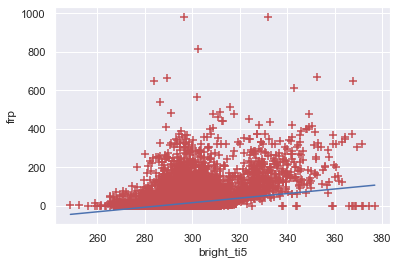

    bright_ti5  bright_ti4      scan
0   298.581007  207.900000  0.457512
1   298.581007  209.507071  0.457512
2   298.581007  211.114141  0.457512
3   298.581007  212.721212  0.457512
4   298.581007  214.328283  0.457512
..         ...         ...       ...
95  298.581007  360.571717  0.457512
96  298.581007  362.178788  0.457512
97  298.581007  363.785859  0.457512
98  298.581007  365.392929  0.457512
99  298.581007  367.000000  0.457512

[100 rows x 3 columns]


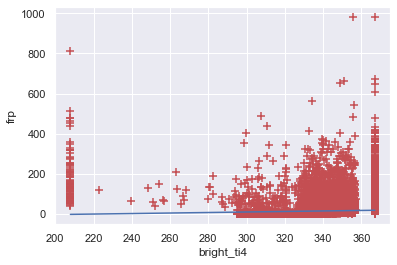

    bright_ti5  bright_ti4      scan
0   298.581007  336.397176  0.320000
1   298.581007  336.397176  0.324848
2   298.581007  336.397176  0.329697
3   298.581007  336.397176  0.334545
4   298.581007  336.397176  0.339394
..         ...         ...       ...
95  298.581007  336.397176  0.780606
96  298.581007  336.397176  0.785455
97  298.581007  336.397176  0.790303
98  298.581007  336.397176  0.795152
99  298.581007  336.397176  0.800000

[100 rows x 3 columns]


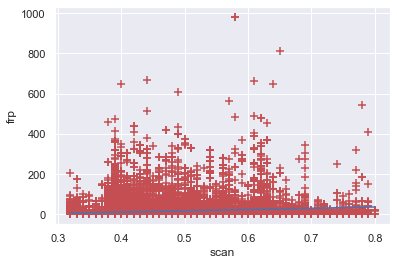

<Figure size 432x288 with 0 Axes>

In [256]:
def linearviz_withmodel(data_xs, data_y, reg_train):
    i = 0
    meancol = data_xs.mean(axis=0).to_frame().transpose()
    for column in data_xs:
        #for scatter plot
        x= data_xs[column]
        y= data_y  
        
        #for model line
        n_line = 100
        x_pred_line = np.linspace(min(x),max(x),n_line)
        X_pred = pd.DataFrame(np.repeat(meancol.values,n_line,axis=0),columns = meancol.columns)
        X_pred[column] = x_pred_line
        y_pred = reg_train.predict(X_pred)
        print(X_pred)
        plt.plot(x_pred_line,y_pred, c = 'k') 

        plt.scatter(x, y, s=60, c='tab:orange', marker='+', alpha =0.5)
        plt.ylabel('frp')
        plt.xlabel(column) 
        plt.show() 
        i += 1
        plt.clf()

print("Dataset: Mixed")
linearviz_withmodel(data_xs_mixed, data_y_mixed, reg_train_mixed)

## 5.3 | Polynomial Model with Cross-Fold Validation

The model is not well-fitted a linear regression curve. Hence, we can try adding polynomial terms to better fit our point. 

To find out how the degree d of the polynomial equation, we shall use cross-fold validation to optimize the hyperparameter d.

In [257]:
typeofmodel = "Polynomial"

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 
def poly_regr(X,y, d = 3):
  poly_reg = PolynomialFeatures(degree=d)
  X_poly = poly_reg.fit_transform(X)

  reg = LinearRegression().fit(X_poly, y)

  #R^2 value, which is max 1
  print("Model Score (R^2):", reg.score(X_poly, y))
  #print("Coeffcients", list(poly_reg.powers_),": ", reg.coef_)
  print("Coeffcients", ": ", reg.coef_)
  print("Intercept:", reg.intercept_)

  return reg

print("Dataset: Mixed")
reg_train_mixed = poly_regr(X_train_mixed, y_train_mixed)

Dataset: Mixed
Model Score (R^2): 0.2932603555618566
Coeffcients :  [[ 0.00000000e+00  9.76326389e+01  2.21409342e+02  6.75244009e+03
   2.46560650e-01 -1.04678336e+00 -3.87536646e+01 -1.97335593e-01
  -1.70540088e+01  3.13316650e+03 -7.30532128e-04  1.23273257e-03
   8.55789155e-02  4.72132461e-04 -1.33663718e-02 -6.72361954e+00
   5.43423709e-05  3.61200769e-02 -1.91248695e+00 -3.51963554e+02]]
Intercept: [-33661.8331226]


In [258]:
# Too many variables, too much memory for kernel to handle 
import time
print("Dataset: Binned")
start = time.time()
print("Degree d : 1")
reg_train_binned_d1 = poly_regr(X_train_binned, y_train_binned, 1)
print('Time=',time.time() - start)

print("")

start = time.time()
print("Degree d : 2")
reg_train_binned_d2 = poly_regr(X_train_binned, y_train_binned, 2)
print('Time=',time.time() - start)

Dataset: Binned
Degree d : 1
Model Score (R^2): 0.007673846116044047
Coeffcients :  [[ 2.81289086e+09  1.98894177e+14  1.98894177e+14  1.98894177e+14
   1.98894177e+14  1.98894177e+14  7.94488430e+14  7.94488430e+14
   7.94488430e+14  7.94488430e+14  7.94488430e+14  1.02128364e+14
   1.02128364e+14  1.02128364e+14  1.02128364e+14  1.02128364e+14
  -2.51710260e+14 -2.51710260e+14 -2.51710260e+14 -2.51710260e+14
  -2.51710260e+14 -1.55221637e+14 -1.55221637e+14 -1.55221637e+14
  -1.55221637e+14 -1.04558297e+13 -1.04558297e+13 -1.04558297e+13
   2.82614635e+14  2.82614635e+14 -8.10839328e+13 -5.44811038e+12
   4.85004972e+13  4.85004972e+13  4.85004972e+13  4.85004972e+13
   4.85004972e+13  4.85004972e+13  4.85004972e+13  4.85004972e+13
   4.85004972e+13  4.85004972e+13  4.85004972e+13 -2.71353253e+13
   4.85004972e+13  4.85004972e+13  4.85004972e+13  4.85004972e+13]]
Intercept: [-9.28157256e+14]
Time= 0.10471987724304199

Degree d : 2
Model Score (R^2): 0.03309772864567684
Coeffcients : 

In [259]:
# Too many variables, too much memory for kernel to handle 
#import time
#start = time.time()
print("Dataset: Binned")
print("Degree d : 3")
#reg_train_binned = poly_regr(X_train_binned, y_train_binned, 3)
#print('Time=',time.time() - start)
print("d = 3 failed after 26 seconds due to not enough RAM")

Dataset: Binned
Degree d : 3
d = 3 failed after 26 seconds due to not enough RAM


As we are unable to run polynomial regression for the binned dataset above d=2, we cannot find the ideal d for the binned dataset. However, based on the accuracy of the linear model v.s. the accuracy of the quadratic model, we can infer that higher degree does not improve accuracy in the case of the binned dataset. This makes sense as we are essentially creating extra variables out of binary variables, which do not change when raised to any power.

In [260]:
##Evaluation of Model Against Test set

def polyevaluation(X_train, y_train, X_test, y_test, reg, d=3):
  
  poly_reg = PolynomialFeatures(degree=d)

  X_poly_train = poly_reg.fit_transform(X_train)
  X_poly_test = poly_reg.fit_transform(X_test)

  
  #Test Set
  y_pred = reg.predict(X_poly_test)
  Test_Scorer2 = reg.score(X_poly_test, y_test)
  print('TestSetScoreR^2:', Test_Scorer2)

  #Print Dataframe Actual v.s. Predicted, Test
  #print(y_pred[:5], type(y_pred), y_pred.shape)
  df = pd.DataFrame(data=np.concatenate((y_test,y_pred),axis=1), columns=["Actual","Predicted"])
  print("Test Set - Actual vs Predicted")
  print (df[:5])

  #Calculate Losses 
  #Loss Test Set
  Loss_test = loss_mse(y_test, y_pred)
  print("Loss Test Set", Loss_test)

  #Loss Train Set
  y_pred_train = reg.predict(X_poly_train)
  Loss_train = loss_mse(y_train, y_pred_train)
  print("Loss Train set:", Loss_train)

  #Calculate percent error and accuracy (Test)
  MAPE = mape (y_test, y_pred)
  Accuracy = accuracy(y_test, y_pred)
  print('Accuracy:', round(Accuracy, 2), '%.')



  return Accuracy, Test_Scorer2, Loss_test

#Dataset, Mixed
print("Dataset: Mixed")
accuracy_mixed, score_mixed, loss_mixed = polyevaluation(X_train_mixed, y_train_mixed, X_test_mixed, y_test_mixed, reg_train_mixed, 3)

print("\n")
print("Dataset: Binned")
print("Degree d = 1")
accuracy_binned_d1, score_binned_d1, loss_binned_d1 = polyevaluation(X_train_binned, y_train_binned, X_test_binned, y_test_binned, reg_train_binned_d1, 1)
print("")
print("Degree d = 2")
accuracy_binned_d2, score_binned_d2, loss_binned_d2 = polyevaluation(X_train_binned, y_train_binned, X_test_binned, y_test_binned, reg_train_binned_d2, 2)

Dataset: Mixed
TestSetScoreR^2: 0.3212804950394553
Test Set - Actual vs Predicted
   Actual  Predicted
0     3.8   6.992124
1    41.3  10.168227
2     1.7   6.066086
3    13.7   9.086876
4     2.3  14.307384
Loss Test Set 720.3481416504487
Loss Train set: 784.1600118594914
Accuracy: 8.98 %.


Dataset: Binned
Degree d = 1
TestSetScoreR^2: 0.0034768193833397687
Test Set - Actual vs Predicted
   Actual  Predicted
0     3.7     16.125
1     8.2     13.625
2     5.3     14.125
3     0.4     12.625
4     4.7     14.500
Loss Test Set 1111.7070225958169
Loss Train set: 1048.3296320146355
Accuracy: 5.44 %.

Degree d = 2
TestSetScoreR^2: -8.911624045616499e+20
Test Set - Actual vs Predicted
   Actual  Predicted
0     3.7   8.515625
1     8.2  12.968750
2     5.3  10.437500
3     0.4  10.500000
4     4.7  14.718750
Loss Test Set 9.941680461577389e+23
Loss Train set: 1021.4709129207619
Accuracy: -14.49 %.


In [261]:
#add the results for the binned model to df_accuracy
#store the model accuracies
dict1 = {'Model Name' : 'Poly d=1, Binned', 
         'DataSet': 'Binned',
         'Type of Model' : typeofmodel,
         'X_features': list(X_train_binned.columns),
         'y_target': list(y_train_binned.columns),
         'Accuracy': accuracy_binned_d1,
         'Loss': loss_binned_d1,
         'Reg/w': reg_train_binned_d1 }

dict2 = {'Model Name' : 'Poly d=2, Binned', 
         'DataSet': 'Binned',
         'Type of Model' : typeofmodel,
         'X_features': list(X_train_binned.columns),
         'y_target': list(y_train_binned.columns),
         'Accuracy': accuracy_binned_d2,
         'Loss': loss_binned_d2,
         'Reg/w': reg_train_binned_d2 }

df_accuracy = df_accuracy.append(dict1, ignore_index = True)
df_accuracy = df_accuracy.append(dict2, ignore_index = True)

For the mixed data set, after the initial testing of the polynomial model at degree d =3, we shall use cross-fold validation to select the ideal d which leads to the least loss/best score. We will be selecting the ideal d based on the mean "score" (R^2 value) of the 4 models generated with the different folds of the training data at each degree.

In [262]:
#Optimization of d
##selection of ideal d
def evaluate_d (degree, Cfolddata, metric_type = 0):
  #initialize return variables
  meanscore = 0
  bestscore = None
  best_set = None
  best_model = None

  #loop through all the train-validation folds in cross-val dictionary
  for setno, setdata in Cfolddata.items():
    #print(setno)
    with HiddenPrints():
      reg_train = poly_regr(setdata['train_X'], setdata['train_y'], degree)
      accuracy_mixed, score_mixed, loss_mixed = polyevaluation(setdata['train_X'], setdata['train_y'],setdata['val_X'], setdata['val_y'], reg_train, degree)
    if metric_type ==0:
      test_score = score_mixed
    elif metric_type ==1:
      test_score = accuracy_mixed
    else:
      test_score = score_mixed
    meanscore += test_score/len(Cfolddata)
    if (bestscore == None or test_score > bestscore):
      #print ("I reached here")
      bestscore = test_score
      best_set = setno
      best_model = reg_train

  return meanscore, bestscore, best_model, best_set

yd =[]
for d in range(1,20):
  meanscore, bestscore, best_model, best_set = evaluate_d(d, CValSets_mixed)
  yd.append({'meanscore':meanscore, 'bestscore':bestscore, 'best_model': best_model, 'best_set':best_set})


    meanscore  bestscore          best_model  best_set
0    0.102872   0.121559  LinearRegression()         2
1    0.273135   0.303382  LinearRegression()         2
2    0.288786   0.316996  LinearRegression()         2
3    0.319293   0.351049  LinearRegression()         4
4    0.321684   0.348064  LinearRegression()         4
5    0.308859   0.340793  LinearRegression()         2
6    0.322077   0.354511  LinearRegression()         2
7    0.309111   0.317487  LinearRegression()         1
8    0.242681   0.302837  LinearRegression()         3
9    0.291875   0.308078  LinearRegression()         1
10   0.172642   0.306301  LinearRegression()         1
11  -0.058437   0.299095  LinearRegression()         1
12  -0.343672   0.308563  LinearRegression()         1
13  -1.755294   0.307300  LinearRegression()         1
14  -1.531749   0.305643  LinearRegression()         1
15  -0.522323   0.298065  LinearRegression()         1
16   0.010451   0.273739  LinearRegression()         1
17   0.043

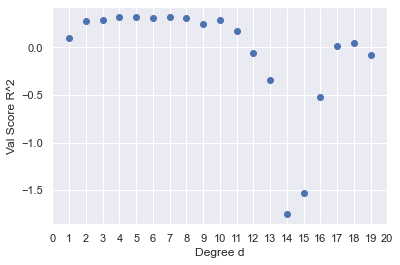

In [263]:
# this is the plot when we cross validate for the ideal dimension d

ydf = pd.DataFrame(data=yd)
plt.scatter(range(1,20), ydf['meanscore'])
plt.ylabel('Val Score R^2')
plt.xlabel('Degree d')
plt.xticks(np.arange(0, 21, 1))
plt.show

best_deg = int(ydf[['meanscore']].idxmax()+1)
best_reg = ydf.at[int(best_deg-1),'best_model']
best_set = ydf.at[int(best_deg-1),'best_set']

print(ydf)
print("Best Validation Score R^2:", max(ydf['meanscore']))
print('Best degree d:', best_deg)

In [264]:
print("Dataset: Mixed")
print('Degree d:', best_deg)

accuracy_cf, score_cf, loss_cf = polyevaluation(X_train_mixed, y_train_mixed, X_test_mixed, y_test_mixed, best_reg, best_deg)


Dataset: Mixed
Degree d: 7
TestSetScoreR^2: 0.32442029043297715
Test Set - Actual vs Predicted
   Actual  Predicted
0     3.8   7.901479
1    41.3   9.816178
2     1.7   5.837924
3    13.7   7.625835
4     2.3  10.997219
Loss Test Set 717.0157697938045
Loss Train set: 724.9201752300555
Accuracy: -24.7 %.


In [265]:
dict1 = {'Model Name' : 'Poly d={0}, Mixed'.format(best_deg), 
         'DataSet': 'Mixed',
         'Type of Model' : typeofmodel,
         'X_features': list(X_train_mixed.columns),
         'y_target': list(y_train_mixed.columns),
         'Accuracy': accuracy_cf,
         'Loss': loss_cf,
         'Reg/w': best_reg }

df_accuracy = df_accuracy.append(dict1, ignore_index = True)

Using R^2 score as a measure to choose the best d parameter does not seem to give the most accurate results. Hence, we shall use Accuracy directly to find the ideal d and Polynomial Model.

In [266]:
yd_acc =[]
for d in range(1,20):
  meanscore, bestscore, best_model, best_set = evaluate_d(d, CValSets_mixed, 1)
  yd_acc.append({'meanscore':meanscore, 'bestscore':bestscore, 'best_model': best_model, 'best_set':best_set})


      meanscore  bestscore          best_model  best_set
0  -6856.353218 -62.154642  LinearRegression()         2
1    -35.182570   3.489457  LinearRegression()         2
2      2.295283  14.060548  LinearRegression()         3
3    -67.965429 -36.395454  LinearRegression()         3
4    -74.941495 -28.394888  LinearRegression()         4
5    -31.567795   5.096774  LinearRegression()         3
6    -36.023596 -11.498857  LinearRegression()         2
7    -69.412281   5.698778  LinearRegression()         3
8    -26.904242 -14.697756  LinearRegression()         2
9    -42.367810 -16.238473  LinearRegression()         2
10   -44.574504 -21.488413  LinearRegression()         2
11   -31.395316  -1.925795  LinearRegression()         4
12   -22.183737   6.302396  LinearRegression()         2
13   -77.937379  -2.123038  LinearRegression()         3
14   -50.530700 -27.105326  LinearRegression()         3
15   -42.616561   0.626087  LinearRegression()         2
16  -122.368080 -11.618293  Lin

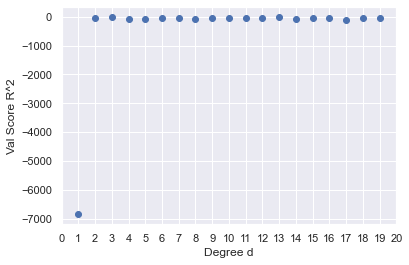

In [267]:
# this is the plot when we cross validate for the ideal hyperparameter d

ydf = pd.DataFrame(data=yd_acc)
plt.scatter(range(1,20), ydf['meanscore'])
plt.ylabel('Val Score R^2')
plt.xlabel('Degree d')
plt.xticks(np.arange(0, 21, 1))
plt.show

best_deg = int(ydf[['meanscore']].idxmax()+1)
best_reg = ydf.at[int(best_deg-1),'best_model']
best_set = ydf.at[int(best_deg-1),'best_set']

print(ydf)
print("Best Validation Score R^2:", max(ydf['meanscore']))
print('Best degree d:', best_deg)

In [268]:
print("Dataset: Mixed")
print('Degree d:', best_deg)

accuracy_cf, score_cf, loss_cf = polyevaluation(X_train_mixed, y_train_mixed, X_test_mixed, y_test_mixed, best_reg, best_deg)


Dataset: Mixed
Degree d: 3
TestSetScoreR^2: 0.31800330822403533
Test Set - Actual vs Predicted
   Actual  Predicted
0     3.8   6.971609
1    41.3  10.223737
2     1.7   5.993054
3    13.7   8.896597
4     2.3  14.554404
Loss Test Set 723.8263317055089
Loss Train set: 785.8371736716323
Accuracy: 14.79 %.


In [269]:
dict1 = {'Model Name' : 'Poly d={0}, Mixed'.format(best_deg), 
         'DataSet': 'Mixed',
         'Type of Model' : typeofmodel,
         'X_features': list(X_train_mixed.columns),
         'y_target': list(y_train_mixed.columns),
         'Accuracy': accuracy_cf,
         'Loss': loss_cf,
         'Reg/w': best_reg }

df_accuracy = df_accuracy.append(dict1, ignore_index = True)

Dataset: Mixed


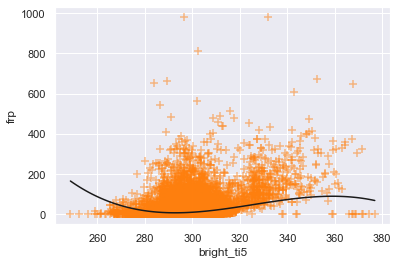

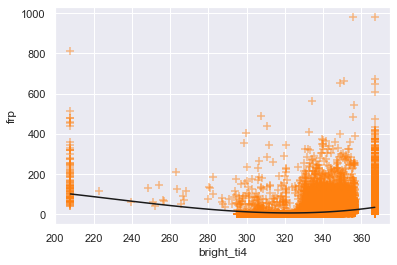

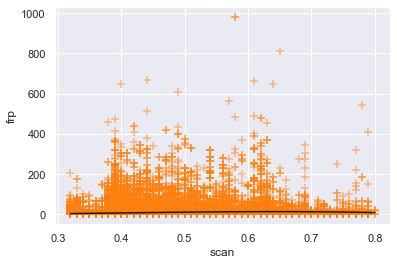

<Figure size 432x288 with 0 Axes>

In [299]:
def polyviz_withmodel(data_xs, data_y, reg_train, d):
    i = 0
    meancol = data_xs.mean(axis=0).to_frame().transpose()
    for column in data_xs:
        #for scatter plot
        x= data_xs[column]
        y= data_y  
        
        #for model line
        n_line = 100
        x_pred_line = np.linspace(min(x),max(x),n_line)
        X_pred = pd.DataFrame(np.repeat(meancol.values,n_line,axis=0),columns = meancol.columns)
        X_pred[column] = x_pred_line
        poly_reg = PolynomialFeatures(degree=d)
        X_pred_poly = poly_reg.fit_transform(X_pred)
        
        y_pred = reg_train.predict(X_pred_poly)
        #print(X_pred)
        plt.plot(x_pred_line,y_pred, c= 'k') 

        plt.scatter(x, y, s=60, c='tab:orange', marker='+', alpha = 0.5)
        plt.ylabel('frp')
        plt.xlabel(column) 
        plt.show() 
        i += 1
        plt.clf()

print("Dataset: Mixed")
polyviz_withmodel(data_xs_mixed, data_y_mixed, best_reg, best_deg)

## 5.4 | Random Forest/Decision Tree
Attempt to use random forest/Decision tree to model the variables

implemented using this: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In [271]:
typeofmodel = "Random Forest"
from sklearn.ensemble import RandomForestRegressor
##convert to numpy to use with randomforest
def rforest(X_train,y_train):
  ##convert to numpy to use with randomforest
  X_trainn = X_train.values
  y_trainn = y_train.values.reshape(-1,)
  # Instantiate model with 20 decision trees
  rf = RandomForestRegressor(n_estimators = 20, random_state = 42)
  # Train the model on training data
  rf.fit(X_trainn, y_trainn)

  print("Model Score (R^2):", rf.score(X_trainn, y_trainn))
  return rf

print("Dataset: Mixed")
reg_train_mixed = rforest(X_train_mixed, y_train_mixed)

print("")
print("Dataset: Binned")
reg_train_binned = rforest(X_train_binned, y_train_binned)

Dataset: Mixed
Model Score (R^2): 0.8634470417562364

Dataset: Binned
Model Score (R^2): 0.2040401977652172


In [272]:
print (reg_train_mixed.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 20, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [273]:
##Evaluation of Model Against Test set

def rfevaluation(X_train, y_train, X_test, y_test, reg):
  ##convert to numpy to use with randomforest
  X_train = X_train.values
  y_train = y_train.values.reshape(-1,)
  X_test = X_test.values
  y_test = y_test.values.reshape(-1,)
  
  #Test Set
  y_pred = reg.predict(X_test)

  #Print Dataframe Actual v.s. Predicted, Test
  #print(y_pred[:5], type(y_pred), y_pred.shape)
  df = pd.DataFrame(data=np.concatenate((y_test.reshape(-1,1),y_pred.reshape(-1,1)),axis=1), columns=["Actual","Predicted"])
  print("Test Set - Actual vs Predicted")
  print (df[:5])

  #Calculate Losses 
  #Loss Test Set
  Loss_test = loss_mse(y_test, y_pred)
  print("Loss Test Set", Loss_test)

  #Loss Train Set
  y_pred_train = reg.predict(X_train)
  Loss_train = loss_mse(y_train, y_pred_train)
  print("Loss Train set:", Loss_train)

  #Calculate percent error and accuracy (Test)
  MAPE = mape (y_test, y_pred)
  Accuracy = accuracy(y_test, y_pred)
  print('Accuracy:', round(Accuracy, 2), '%.')

  return Accuracy, MAPE, Loss_test

#Dataset, Mixed
print("Dataset: Mixed")
accuracy_mixed, mape_mixed, loss_mixed = rfevaluation(X_train_mixed, y_train_mixed, X_test_mixed, y_test_mixed, reg_train_mixed)

print("")
print("Dataset: Binned")
accuracy_binned, mape_binned, loss_binned = rfevaluation(X_train_binned, y_train_binned, X_test_binned, y_test_binned, reg_train_binned)

Dataset: Mixed
Test Set - Actual vs Predicted
   Actual  Predicted
0     3.8   5.078929
1    41.3  11.295000
2     1.7   7.160000
3    13.7   4.978750
4     2.3  24.010000
Loss Test Set 859.8305734664009
Loss Train set: 151.5117627807708
Accuracy: 32.33 %.

Dataset: Binned
Test Set - Actual vs Predicted
   Actual  Predicted
0     3.7  13.805955
1     8.2  12.085714
2     5.3  10.970119
3     0.4   6.117751
4     4.7  14.588610
Loss Test Set 1245.8466033704083
Loss Train set: 840.8810382647752
Accuracy: 9.93 %.


In [274]:
#store the model accuracies
dict2 = {'Model Name' : 'Random Forest, Mixed', 
         'DataSet': 'Mixed',
         'Type of Model' : typeofmodel,
         'X_features': list(X_train_mixed.columns),
         'y_target': list(y_train_mixed.columns),
         'Accuracy': accuracy_mixed,
         'Loss': loss_mixed,
         'Reg/w': reg_train_mixed }


df_accuracy = df_accuracy.append(dict2, ignore_index = True)

In [275]:
dict3 = {'Model Name' : 'Random Forest, Binned', 
         'DataSet': 'Binned',
         'Type of Model' : typeofmodel,
         'X_features': list(X_train_binned.columns),
         'y_target': list(y_train_binned.columns),
         'Accuracy': accuracy_binned,
         'Loss': loss_binned,
         'Reg/w': reg_train_binned }


df_accuracy = df_accuracy.append(dict3, ignore_index = True)

In [276]:
df_accuracy

,Model Name,DataSet,Type of Model,X_features,y_target,Accuracy,Loss,Reg/w
0,"Linear, Mixed",Mixed,Linear,"[bright_ti5, bright_ti4, scan]",[frp],-113.102285,9.501669e+02,LinearRegression()
1,"Linear, Binned",Binned,Linear,"[bright_ti4_bright_ti4_100p, bright_ti4_bright...",[frp],5.398098,1.111079e+03,LinearRegression()
2,"Poly d=1, Binned",Binned,Polynomial,"[bright_ti4_bright_ti4_100p, bright_ti4_bright...",[frp],5.436949,1.111707e+03,LinearRegression()
3,"Poly d=2, Binned",Binned,Polynomial,"[bright_ti4_bright_ti4_100p, bright_ti4_bright...",[frp],-14.486681,9.941680e+23,LinearRegression()
4,"Poly d=7, Mixed",Mixed,Polynomial,"[bright_ti5, bright_ti4, scan]",[frp],-24.704094,7.170158e+02,LinearRegression()
5,"Poly d=3, Mixed",Mixed,Polynomial,"[bright_ti5, bright_ti4, scan]",[frp],14.787248,7.238263e+02,LinearRegression()
6,"Random Forest, Mixed",Mixed,Random Forest,"[bright_ti5, bright_ti4, scan]",[frp],32.329099,8.598306e+02,"(DecisionTreeRegressor(max_features='auto', ra..."
7,"Random Forest, Binned",Binned,Random Forest,"[bright_ti4_bright_ti4_100p, bright_ti4_bright...",[frp],9.926596,1.245847e+03,"(DecisionTreeRegressor(max_features='auto', ra..."


Dataset: Mixed


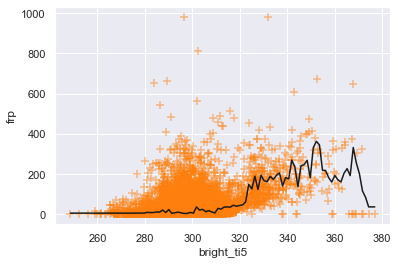

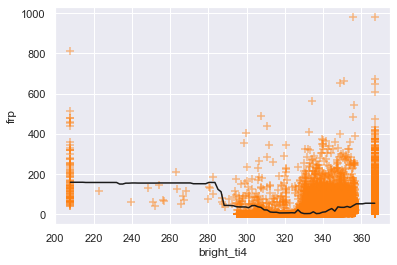

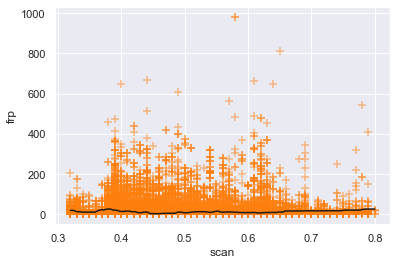

<Figure size 432x288 with 0 Axes>

In [298]:
def rfviz_withmodel(data_xs, data_y, reg_train):
    i = 0
    meancol = data_xs.mean(axis=0).to_frame().transpose()
    for column in data_xs:
        #for scatter plot
        x= data_xs[column]
        y= data_y  
        
        #for model line
        n_line = 100
        x_pred_line = np.linspace(min(x),max(x),n_line)
        X_pred = pd.DataFrame(np.repeat(meancol.values,n_line,axis=0),columns = meancol.columns)
        X_pred[column] = x_pred_line
        y_pred = reg_train.predict(X_pred)
        #print(X_pred)
        plt.plot(x_pred_line,y_pred, c= 'k') 

        plt.scatter(x, y, s=60, c='tab:orange', marker='+', alpha = 0.5)
        plt.ylabel('frp')
        plt.xlabel(column) 
        plt.show() 
        i += 1
        plt.clf()

print("Dataset: Mixed")
rfviz_withmodel(data_xs_mixed, data_y_mixed, reg_train_mixed)

# 6 | Comparison between Models
In this section, we shall compare the predictive models that we have created for frp and conclude with our results.


In [278]:
df_accuracy.drop_duplicates(subset='Model Name', inplace = True)
df_accuracy

,Model Name,DataSet,Type of Model,X_features,y_target,Accuracy,Loss,Reg/w
0,"Linear, Mixed",Mixed,Linear,"[bright_ti5, bright_ti4, scan]",[frp],-113.102285,9.501669e+02,LinearRegression()
1,"Linear, Binned",Binned,Linear,"[bright_ti4_bright_ti4_100p, bright_ti4_bright...",[frp],5.398098,1.111079e+03,LinearRegression()
2,"Poly d=1, Binned",Binned,Polynomial,"[bright_ti4_bright_ti4_100p, bright_ti4_bright...",[frp],5.436949,1.111707e+03,LinearRegression()
3,"Poly d=2, Binned",Binned,Polynomial,"[bright_ti4_bright_ti4_100p, bright_ti4_bright...",[frp],-14.486681,9.941680e+23,LinearRegression()
4,"Poly d=7, Mixed",Mixed,Polynomial,"[bright_ti5, bright_ti4, scan]",[frp],-24.704094,7.170158e+02,LinearRegression()
5,"Poly d=3, Mixed",Mixed,Polynomial,"[bright_ti5, bright_ti4, scan]",[frp],14.787248,7.238263e+02,LinearRegression()
6,"Random Forest, Mixed",Mixed,Random Forest,"[bright_ti5, bright_ti4, scan]",[frp],32.329099,8.598306e+02,"(DecisionTreeRegressor(max_features='auto', ra..."
7,"Random Forest, Binned",Binned,Random Forest,"[bright_ti4_bright_ti4_100p, bright_ti4_bright...",[frp],9.926596,1.245847e+03,"(DecisionTreeRegressor(max_features='auto', ra..."


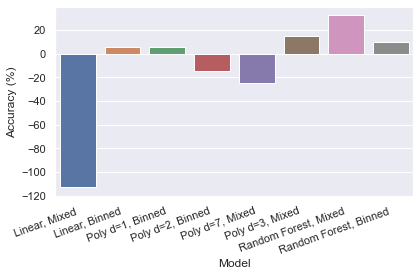

In [293]:
ax = sns.barplot(data= df_accuracy, x = 'Model Name', y = 'Accuracy')

ax.set(xlabel='Model', ylabel = 'Accuracy (%)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
plt.tight_layout()
plt.show()

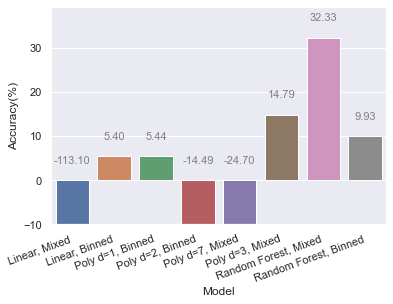

In [294]:
ax = sns.barplot(data= df_accuracy, x = 'Model Name', y = 'Accuracy')

ax.set(ylim=(-10, max(df_accuracy['Accuracy'])+7))
ax.set(xlabel='Model', ylabel = 'Accuracy(%)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")

#ax=g
#annotate axis = seaborn axis
for p in ax.patches:
    if(p.get_height() >0):
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')
    else:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., 0),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
                 textcoords='offset points')          
_ = ax #To make space for the annotations

plt.show()

# Trash



In [281]:
from sklearn.model_selection import train_test_split
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(data_xs, data_y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


##svm doesnt work because its meant for classification
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

NameError: name 'data_xs' is not defined

In [ ]:
## Print Formats 
loss = loss_mse(y_test, y_pred)
print("Loss Test Set:", loss)

y_pred_train = reg_train.predict(X_train)
loss = loss_mse(y_train, y_pred_train)
print("Loss Train set:", loss)


print('Accuracy:', round(accuracy(y_test, y_pred), 2), '%.')

In [ ]:
from sklearn import metrics
def sklearn_metrics(y_actual, y_pred):

  print('Mean Absolute Error:', metrics.mean_absolute_error(y_actual, y_pred))
  print('Mean Squared Error (Loss that we have defined):', metrics.mean_squared_error(y_actual, y_pred))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_actual, y_pred)))
  print('Accuracy (sklearn):', metrics.accuracy_score(y_actual, y_pred) )

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
d = 4

def poly_reg(X_train,y_train,d, X_test, y_test):
  poly_reg = PolynomialFeatures(degree=d)
  X_poly = poly_reg.fit_transform(X_train)

  reg = LinearRegression().fit(X_poly, y_train)

  X_poly_t = poly_reg.fit_transform(X_test)
  #R^2 value, which is between -1 and 1
  print("Training Loss of R^2:", reg.score(X_poly, y_train))
  print("Test Loss of R^2:", reg.score(X_poly_t, y_test))
  #print("Coeffcients [x1,x2] : ", reg.coef_)
  #print("Intercept:", reg.intercept_)
  y_pred_t = reg.predict(X_poly_t)

  #loss
  mse = metrics.mean_squared_error(y_test, y_pred_t)
  #score, this was the original metric i used 
  reg.score(X_poly_t, y_test)

  return reg, X_poly, mse

reg_train, X_poly, test_score = poly_reg(X_train, y_train, 4, X_test, y_test)

#R^2 value, which is between -1 and 1
#print("Model Loss of R^2:", poly_reg.score(X, y))


In [ ]:
polyreg = PolynomialFeatures(degree=best_dim)
X_poly_t = polyreg.fit_transform(X_test)
X_poly = polyreg.fit_transform(X_train)
print(X_poly_t.shape)



y_pred = best_reg.predict(X_poly_t)
print("Coeffcients [x1,x2] : ", best_reg.coef_.shape)
print("Intercept:", best_reg.intercept_)


print(y_pred[:5], type(y_pred), y_pred.shape)

df = pd.DataFrame(data=np.concatenate((y_test,y_pred, abs(y_pred-y_test)),axis=1), columns=["Actual","Predicted", "Error"])

print (df[:5])

def loss_mse(y_pred, y_test):
  n = len(y_pred)
  total = (y_pred-y_test).T.dot(y_pred-y_test)
  loss = 1/n* total
  return loss

loss = loss_mse(y_pred, y_test)
print("Loss Test Set", loss)

y_pred_train = best_reg.predict(X_poly)
loss = loss_mse(y_pred_train, y_train)
print("Loss Train set:", loss)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


# Calculate mean absolute percentage error (MAPE) modified to account for zeros in the actual readings
mape = 100 * (abs(y_pred-y_test) / ((abs(y_test+y_pred))/2)).values
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)

print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
##selection of ideal d
def bestd (dim, splitdata):
  meanscore = 0
  bestscore = 0
  best_set = None
  best_model = None
  for setno, setdata in splitdata.items():
    #print(setno)
    reg_train, X_poly, test_score = poly_reg(setdata['train_X'], setdata['train_y'], dim, setdata['val_X'], setdata['val_y'])
    meanscore += test_score/len(splitdata)
    if (test_score < bestscore):
      bestscore = test_score
      best_set = setno
      best_model = reg_train

  return meanscore, bestscore, best_model, best_set

yd =[]
for d in range(1,20):

  meanscore, bestscore, best_model, best_set = bestd (d, splitdata)
  yd.append({'meanscore':meanscore, 'bestscore':bestscore, 'best_model': best_model, 'best_set':best_set})



##### 0.1 | trash rf


In [ ]:
print(type(y_train))
print(type(X_train))

##convert to numpy to use with randomforest
X_trainn = X_train.values
y_trainn = y_train.values.reshape(-1,)

print(type(y_trainn), y_trainn.shape)
print(type(X_trainn), X_trainn.shape)

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 20 decision trees
rf = RandomForestRegressor(n_estimators = 20, random_state = 42)
# Train the model on training data
rf.fit(X_trainn, y_trainn);

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test.values)
# Calculate the absolute errors
errors = abs(predictions - y_test.values.reshape(-1,))
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))


df = pd.DataFrame(data=np.concatenate((y_test,predictions.reshape(-1,1), errors.reshape(-1,1)),axis=1), columns=["Actual","Predicted", "Absolute Error"])

print (df[:5])

In [ ]:
# Calculate mean absolute percentage error (MAPE) modified to account for zeros in the actual readings
mape = 100 * (errors / ((abs(y_test.values.reshape(-1,))+abs(predictions))/2))
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)

print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
feature_list = X_train.columns

# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)


In [ ]:
#run with caution Already generated in folder
# Use dot file to create a graph
# oh no this takes forever to excute - estimated time = 4mins
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file - estimated time >15mins
graph.write_png('tree.png')